In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


## data 불러오기

In [2]:
data_df = pd.read_csv('Data Carrard et al. 2022 MedTeach.csv').drop(columns='id')
data_describe = pd.read_csv('Codebook Carrard et al. 2022 MedTeach.csv', sep=';')

In [3]:
data_describe

,Variable Name,Variable Label,Variable Scale,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,id,Participants ID number,string,NaN,NaN,NaN
1,age,age at questionnaire 20-21,numeric,NaN,NaN,NaN
2,year,CURICULUM YEAR : In which curriculum year are ...,1=Bmed1; 2=Bmed2; 3=Bmed3; 4=Mmed1; 5=Mmed2; 6...,NaN,NaN,NaN
3,sex,GENDER : To which gender do you identify the m...,1=Man; 2=Woman; 3=Non-binary,NaN,NaN,NaN
4,glang,MOTHER TONGUE: What is your mother tongue?,1=French; 15=German; 20=English; 37=Arab; 51=B...,NaN,NaN,NaN
5,part,PARTNERSHIP STATUS : Do you have a partner?,0=No; 1=Yes,NaN,NaN,NaN
6,job,HAVING A JOB : Do you have a paid job?,0=No; 1=Yes,NaN,NaN,NaN
7,stud_h,"HOURS OF STUDY PER WEEK : On average, how many...",NaN,NaN,NaN,NaN
8,health,SATISFACTION WITH HEALTH : How satisfied are y...,1=Verydissatisfied; 2=Dissatisfied; 3=Neithers...,NaN,NaN,NaN
9,psyt,PSYCHOTHERAPY LAST YEAR : During the last 12 m...,0=No; 1=Yes,NaN,NaN,NaN


In [4]:
newnames = ["depression", "anxiety", "exhaustion", "cynicism", "efficacy"]
data_df.columns = list(data_df.columns[:14]) + newnames + list(data_df.columns[19:])

data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         886 non-null    int64  
 1   year        886 non-null    int64  
 2   sex         886 non-null    int64  
 3   glang       886 non-null    int64  
 4   part        886 non-null    int64  
 5   job         886 non-null    int64  
 6   stud_h      886 non-null    int64  
 7   health      886 non-null    int64  
 8   psyt        886 non-null    int64  
 9   jspe        886 non-null    int64  
 10  qcae_cog    886 non-null    int64  
 11  qcae_aff    886 non-null    int64  
 12  amsp        886 non-null    int64  
 13  erec_mean   886 non-null    float64
 14  depression  886 non-null    int64  
 15  anxiety     886 non-null    int64  
 16  exhaustion  886 non-null    int64  
 17  cynicism    886 non-null    int64  
 18  efficacy    886 non-null    int64  
dtypes: float64(1), int64(18)
memo

In [5]:
select = ['age', 'year', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean'] + newnames
data_statistics = data_df[select].describe()
data_statistics

,age,year,stud_h,jspe,qcae_cog,qcae_aff,erec_mean,depression,anxiety,exhaustion,cynicism,efficacy
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,22.383747,3.102709,25.288939,106.374718,58.525959,34.784424,0.720144,18.050790,42.898420,16.878104,10.079007,24.207675
std,3.300664,1.763937,15.927875,8.784012,6.570341,5.377062,0.093570,11.478731,11.978458,5.256025,4.592609,4.633675
min,17.000000,1.000000,0.000000,67.000000,37.000000,18.000000,0.357143,0.000000,20.000000,5.000000,4.000000,10.000000
25%,20.000000,1.000000,12.000000,101.000000,54.000000,31.000000,0.666667,9.000000,34.000000,13.000000,6.000000,21.000000
50%,22.000000,3.000000,25.000000,107.000000,58.000000,35.000000,0.726190,16.000000,43.000000,17.000000,9.000000,24.000000
75%,24.000000,5.000000,36.000000,113.000000,63.000000,39.000000,0.785714,25.000000,51.000000,20.000000,13.000000,28.000000
max,49.000000,6.000000,70.000000,125.000000,76.000000,48.000000,0.952381,56.000000,77.000000,30.000000,24.000000,36.000000


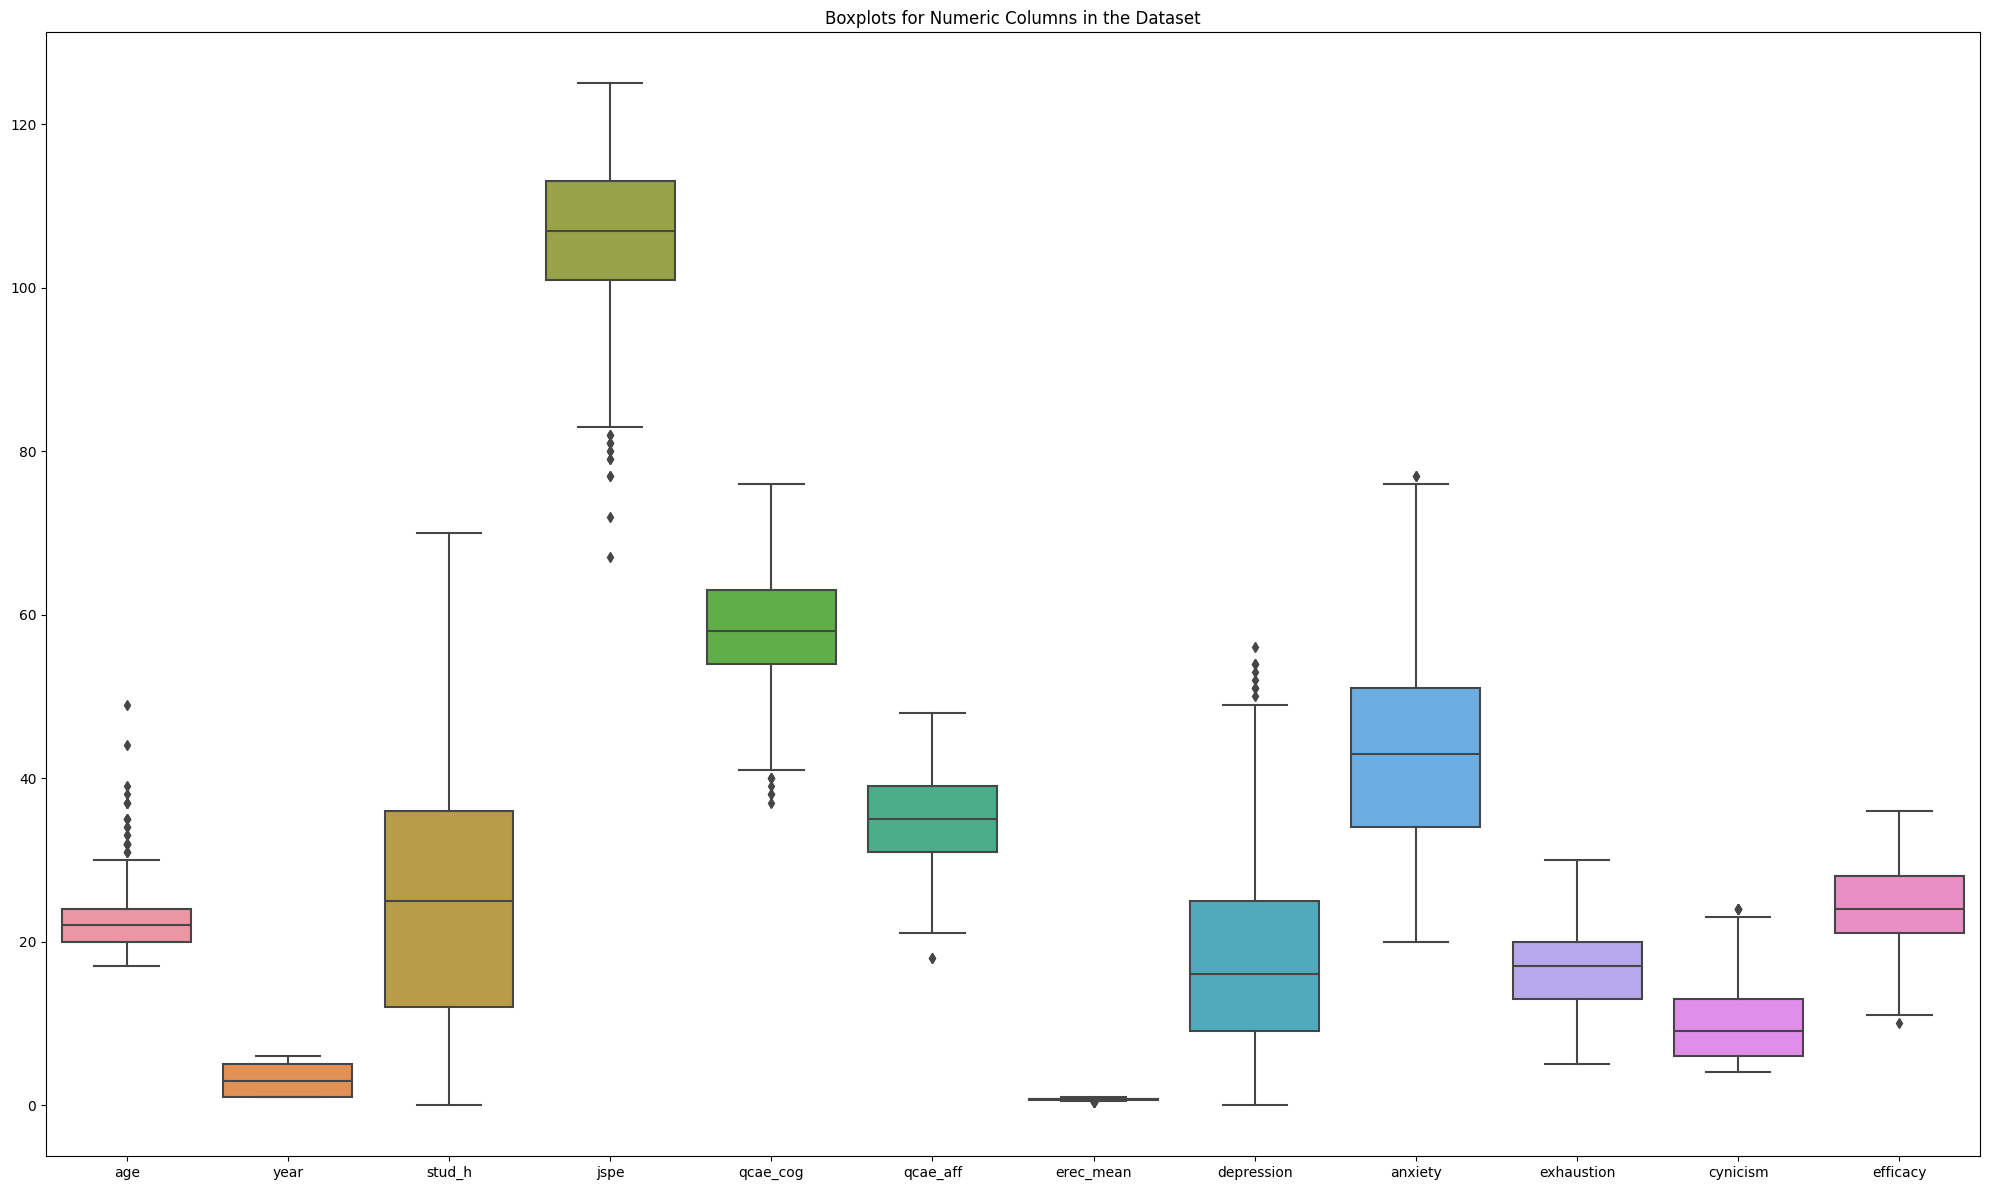

In [6]:
plt.figure(figsize=(20, 12))

sns.boxplot(data=data_df[select])
plt.title("Boxplots for Numeric Columns in the Dataset")
plt.tight_layout()

plt.show()

In [7]:
for i in range(len(data_df)):
    if data_df['jspe'][i] < 80:
        data_df['jspe'][i] = None
    
    if data_df['qcae_cog'][i] < 30:
        data_df['qcae_cog'][i] = None

    if data_df['depression'][i] > 50:
        data_df['depression'][i] = None
data_df = data_df.dropna(axis = 0)

C:\Users\박채윤\AppData\Local\Temp\ipykernel_15792\2342138794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['depression'][i] = None
C:\Users\박채윤\AppData\Local\Temp\ipykernel_15792\2342138794.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['jspe'][i] = None


In [8]:
data_df

,age,year,sex,glang,part,job,stud_h,health,psyt,jspe,qcae_cog,qcae_aff,amsp,erec_mean,depression,anxiety,exhaustion,cynicism,efficacy
0,18,1,1,120,1,0,56,3,0,88.0,62,27,17,0.738095,34.0,61,17,13,20
1,26,4,1,1,1,0,20,4,0,109.0,55,37,22,0.690476,7.0,33,14,11,26
2,21,3,2,1,0,0,36,3,0,106.0,64,39,17,0.690476,25.0,73,24,7,23
3,21,2,2,1,0,1,51,5,0,101.0,52,33,18,0.833333,17.0,48,16,10,21
4,21,3,1,1,1,0,22,4,0,102.0,58,28,21,0.690476,14.0,46,22,14,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,21,2,1,1,1,0,45,3,0,106.0,63,39,28,0.619048,41.0,39,23,4,34
882,20,2,2,1,0,0,13,3,0,113.0,67,40,21,0.809524,26.0,41,17,5,24
883,19,1,1,1,0,0,50,5,0,100.0,50,31,24,0.547619,14.0,45,15,8,31
884,24,5,2,1,0,0,20,2,1,120.0,64,39,21,0.785714,33.0,58,22,15,19


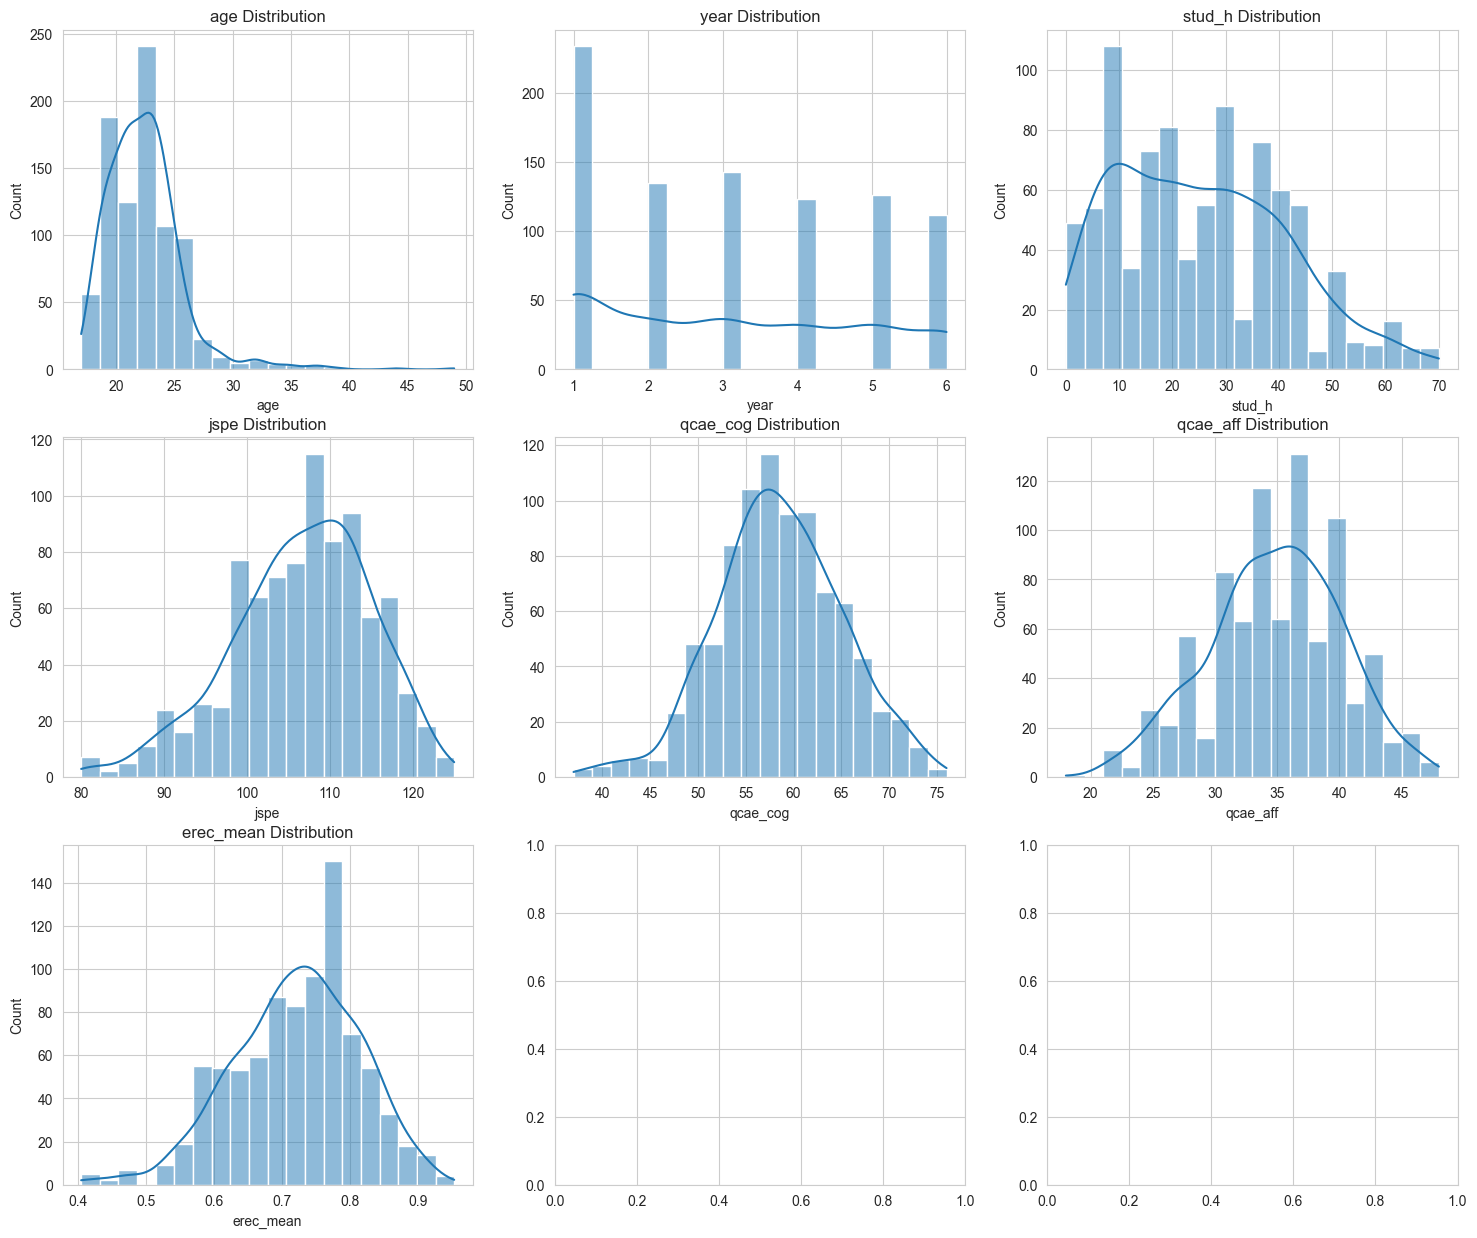

In [9]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))

temp = ['age', 'year', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean']
for i in range(len(temp)):
    sns.histplot(data=data_df[temp[i]], bins=20, ax=axes[i//3, i%3], kde = True)
    axes[i//3, i%3].set_title(f"{temp[i]} Distribution")

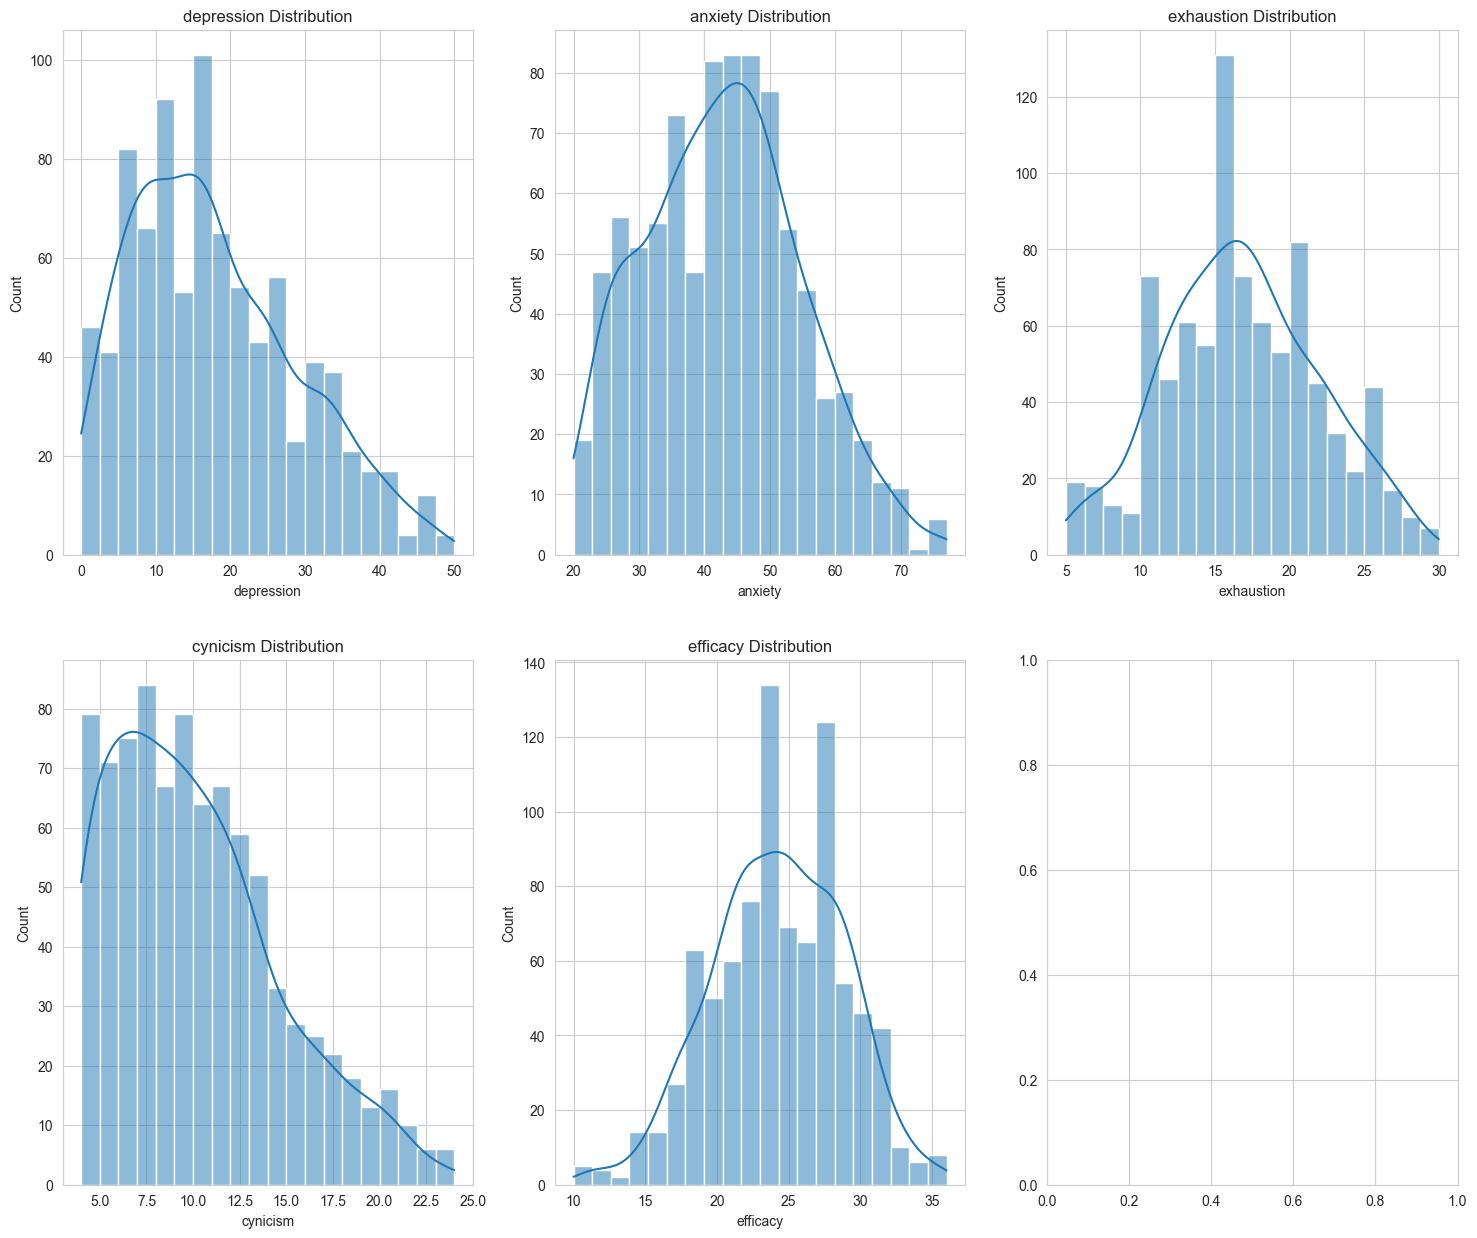

In [10]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15))

mental_list = ["depression", "anxiety", "exhaustion", "cynicism", "efficacy"]
for i in range(len(mental_list)):
    sns.histplot(data=data_df[mental_list[i]], bins=20, ax=axes[i//3, i%3], kde = True)
    axes[i//3, i%3].set_title(f"{mental_list[i]} Distribution")

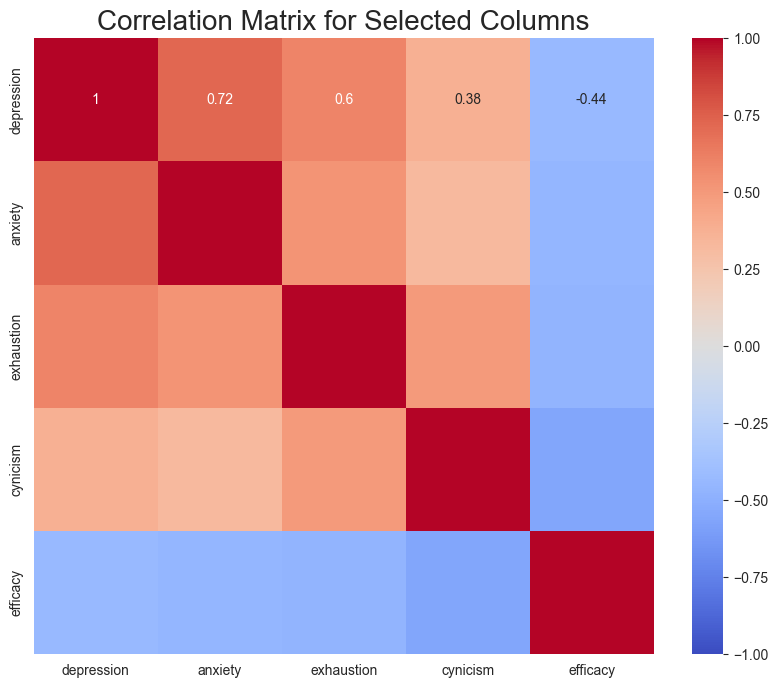

In [11]:
selected_corr_matrix = data_df[mental_list].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Selected Columns", fontsize=20)
plt.show()

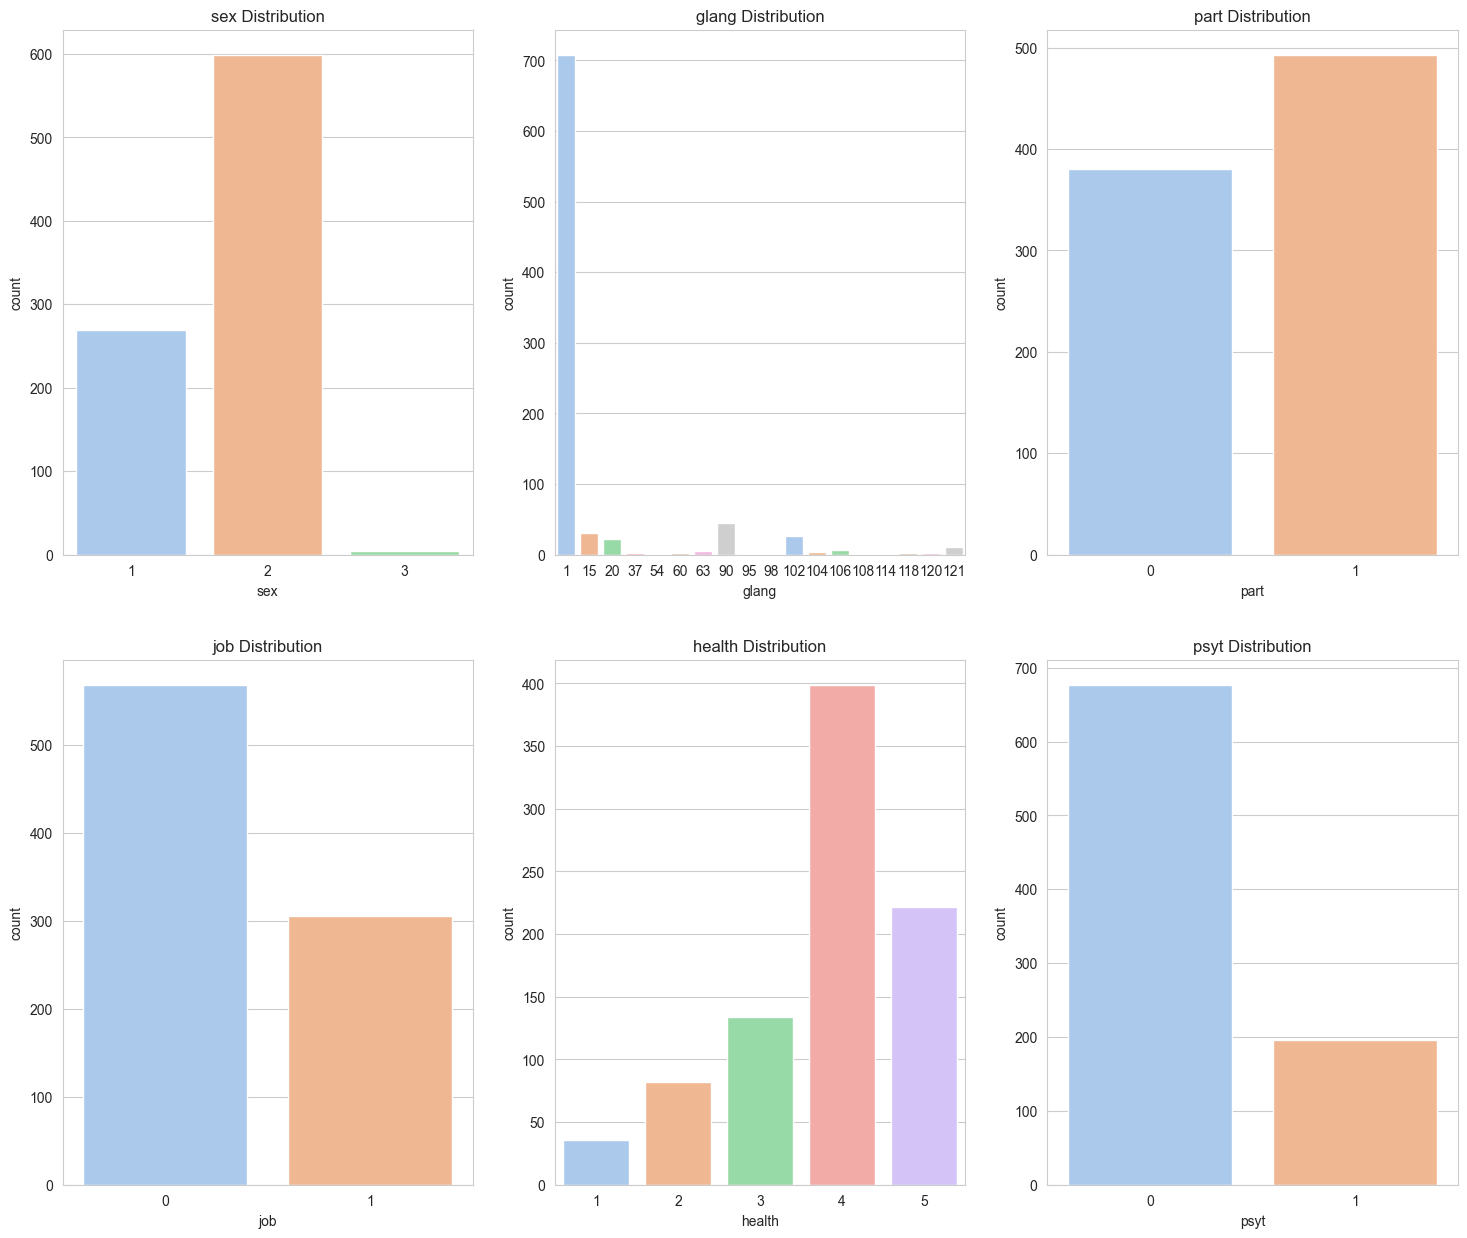

In [12]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15))

categorical_list = ["sex", "glang", "part", "job", "health", 'psyt']
for i in range(len(categorical_list)):
    sns.countplot(data=data_df, x=categorical_list[i],ax=axes[i//3, i%3], palette="pastel")

    axes[i//3, i%3].set_title(f"{categorical_list[i]} Distribution")

# 학년에 따른 공부시간

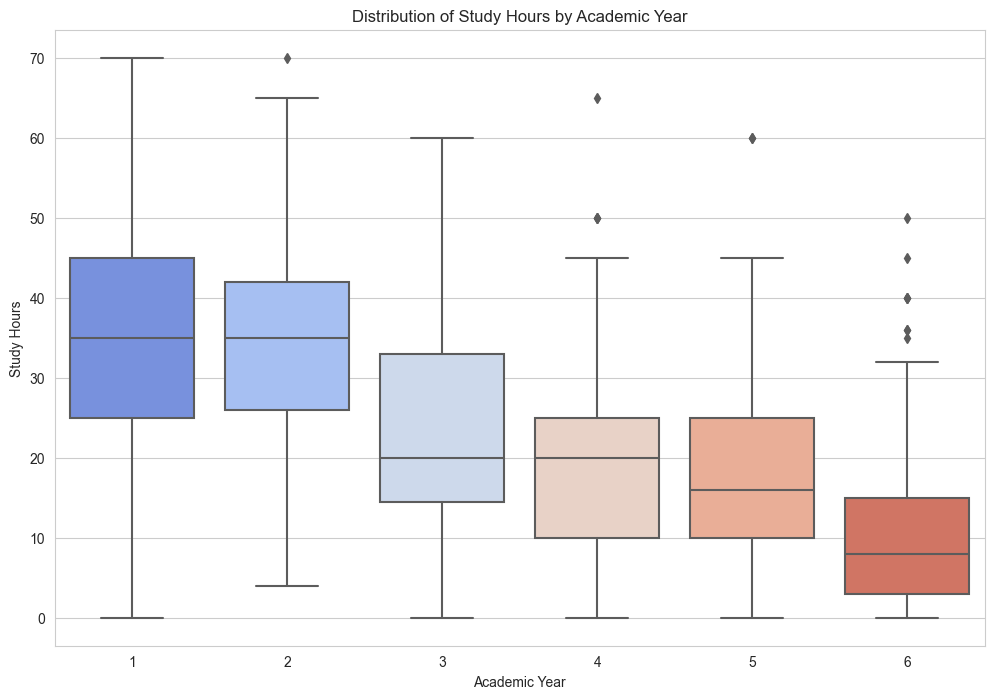

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_df, x='year', y='stud_h', palette="coolwarm")
plt.title("Distribution of Study Hours by Academic Year")
plt.xlabel("Academic Year")
plt.ylabel("Study Hours")
plt.show()


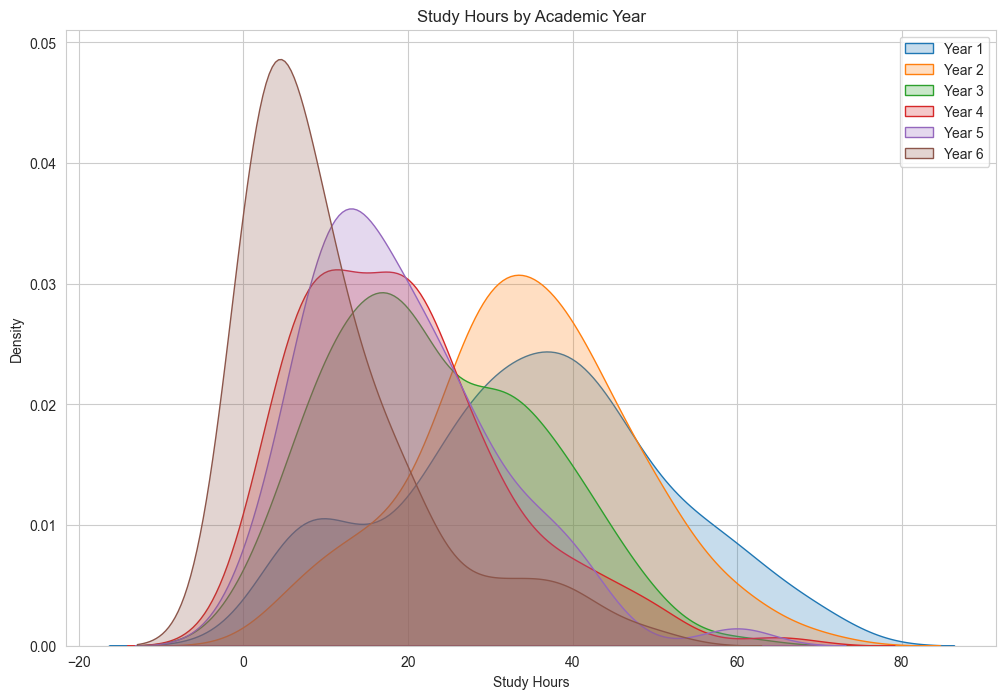

In [14]:
plt.figure(figsize=(12, 8))

for year in range(1,7):
    subset = data_df[data_df['year'] == year]
    sns.kdeplot(subset['stud_h'], label=f"Year {year}", fill = True)

plt.title("Study Hours by Academic Year")
plt.xlabel("Study Hours")
plt.ylabel("Density")
plt.legend()
plt.show()


# 학년에 따른 mental

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


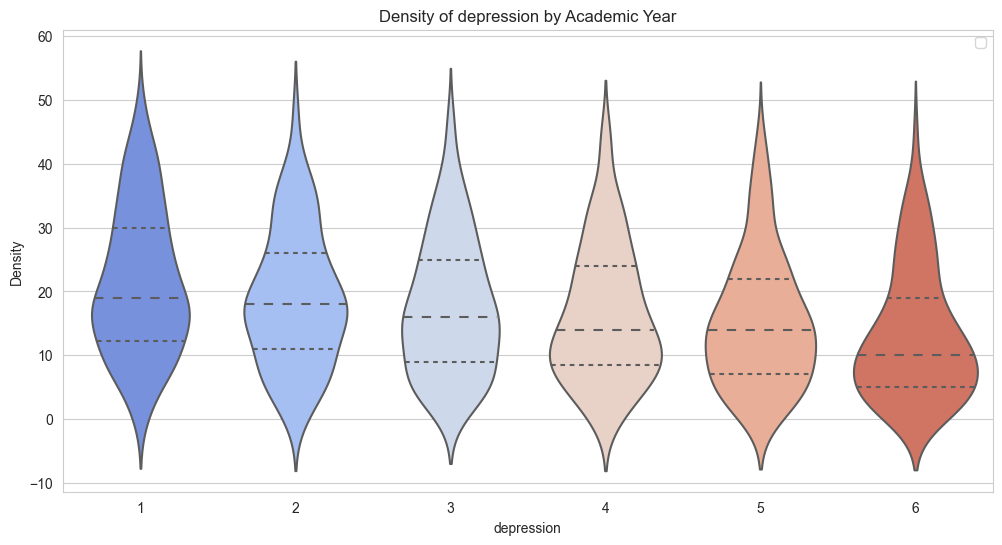

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


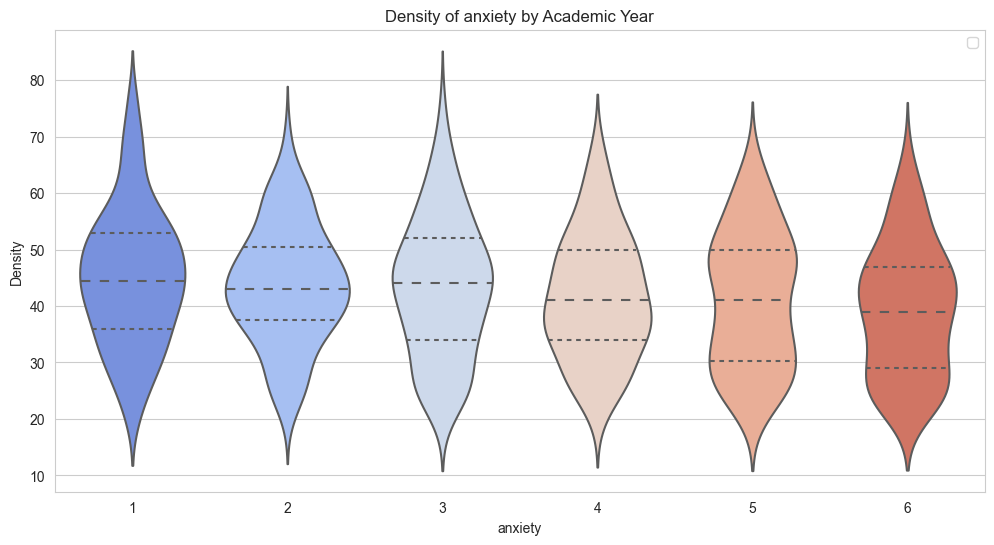

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


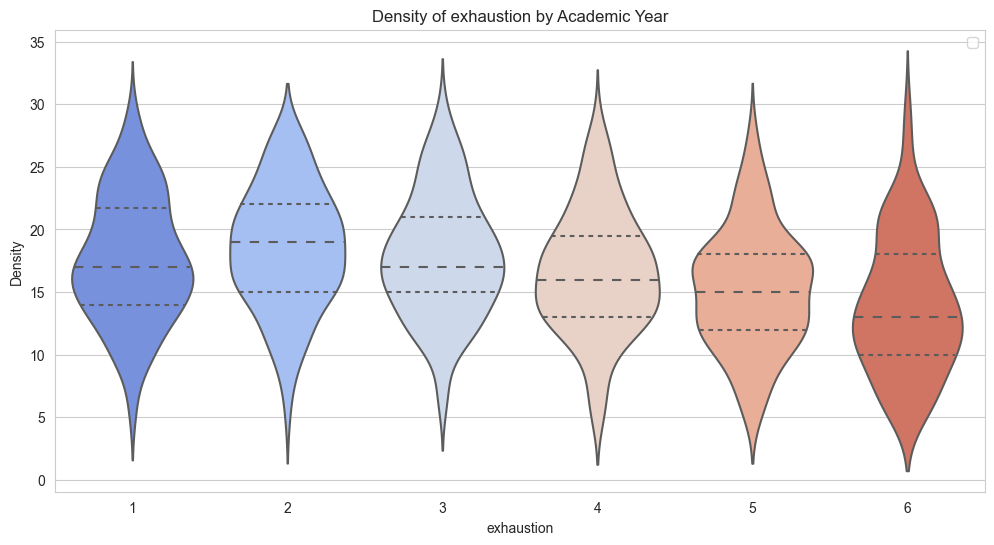

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


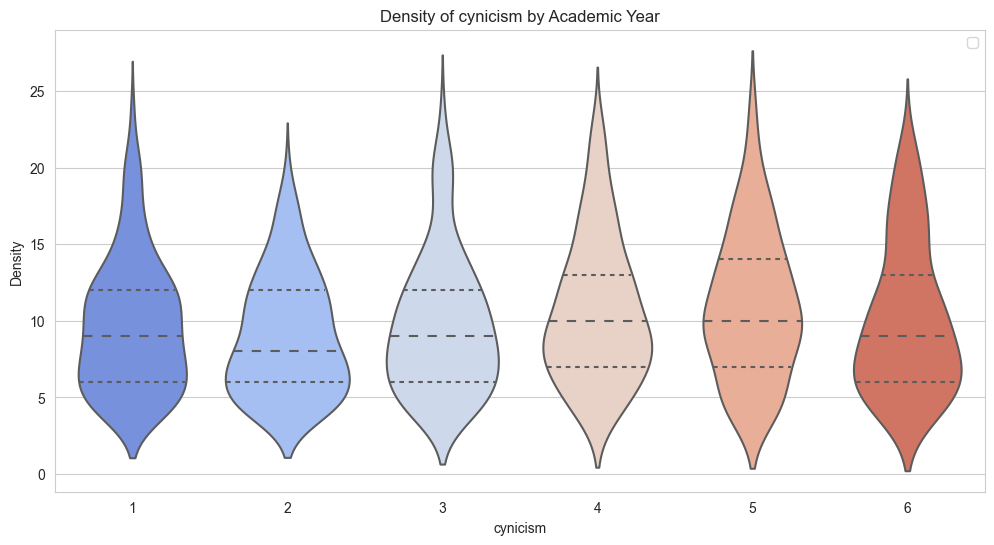

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


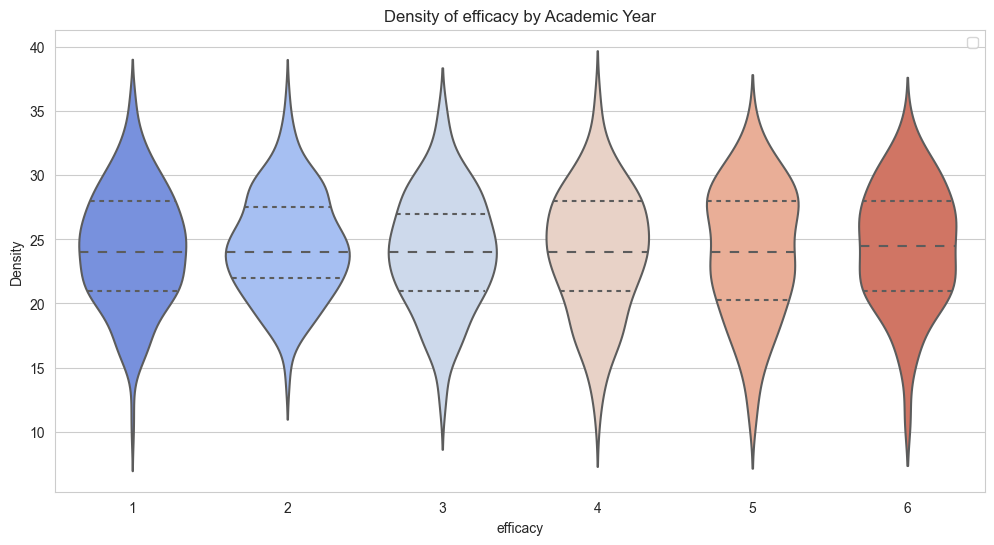

In [15]:
for mental in ["depression", "anxiety", "exhaustion", "cynicism", "efficacy"]:
    plt.figure(figsize=(12, 6))
    
    sns.violinplot(data=data_df, x='year', y=mental, palette="coolwarm", inner='quartile')

    plt.title(f"Density of {mental} by Academic Year")
    plt.xlabel(mental)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


# 학년에 따른 건강

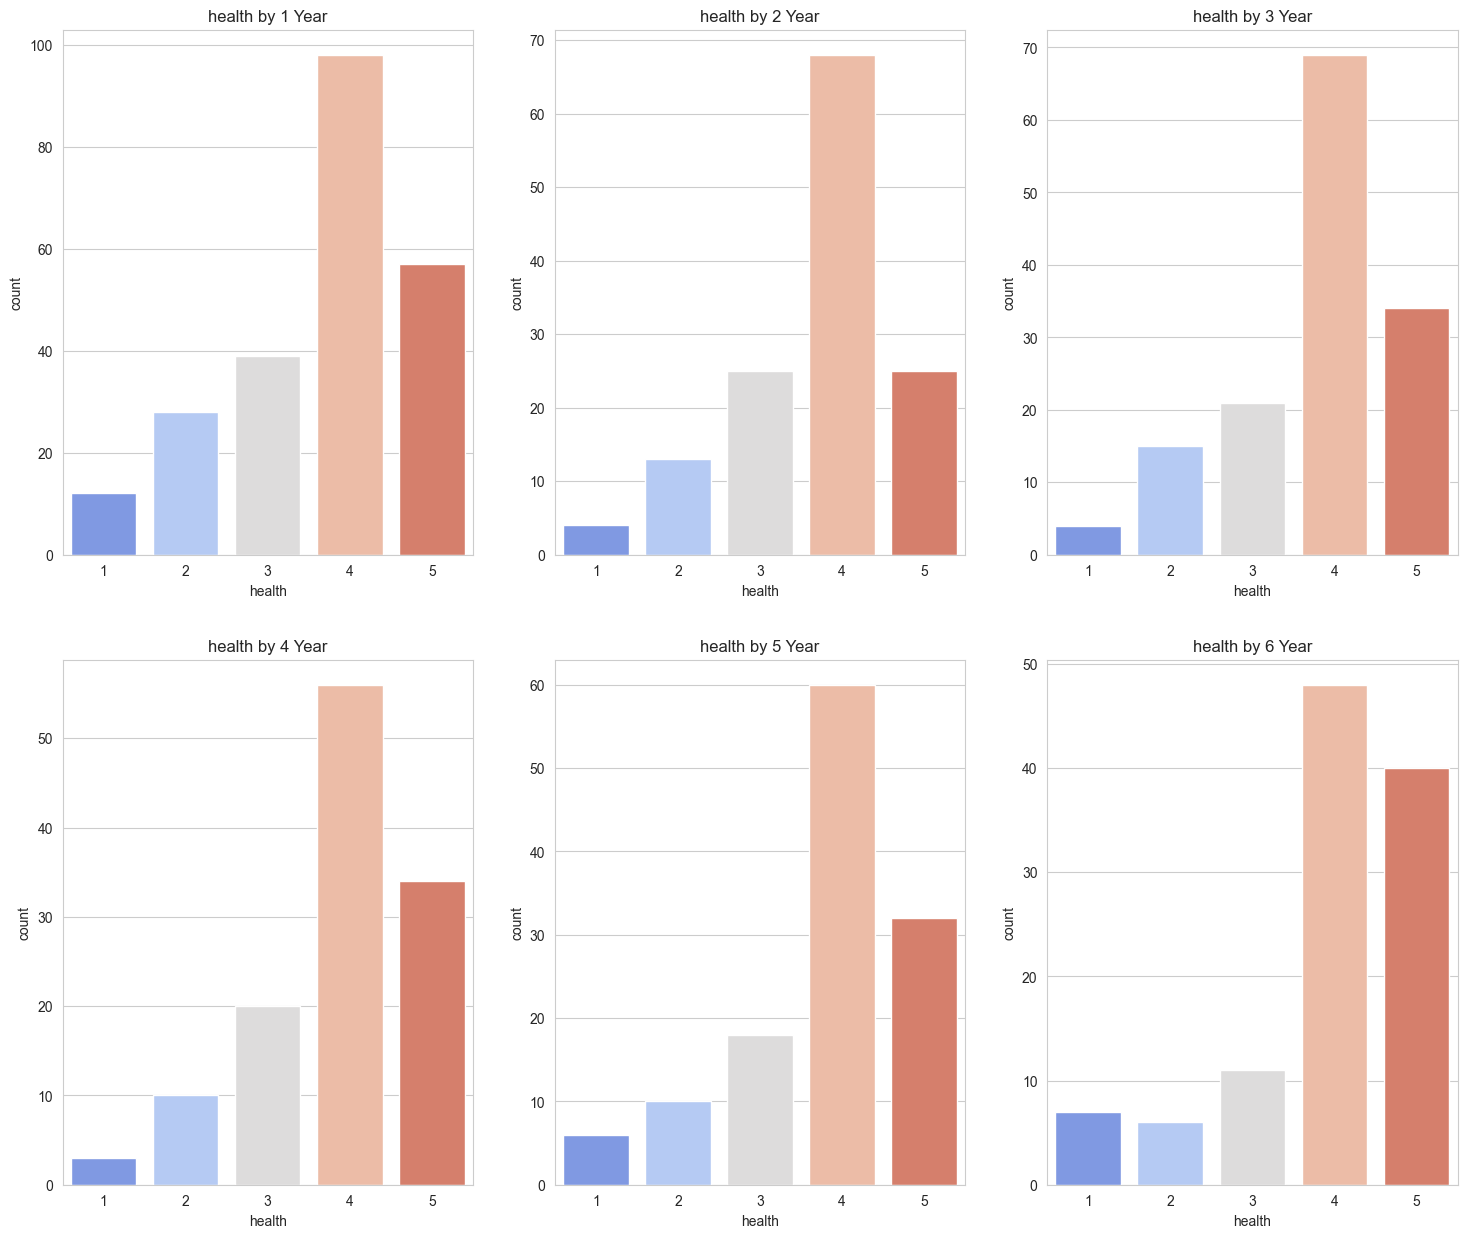

In [16]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15))

for year_index in range(6):
    
    subset = data_df[data_df['year'] == year_index+1]
    sns.countplot(data=subset, x='health', palette="coolwarm", ax=axes[year_index//3, year_index%3])
    axes[year_index//3, year_index%3].set_title(f"health by {year_index+1} Year")
    

## 공부 시간에 따른 mental

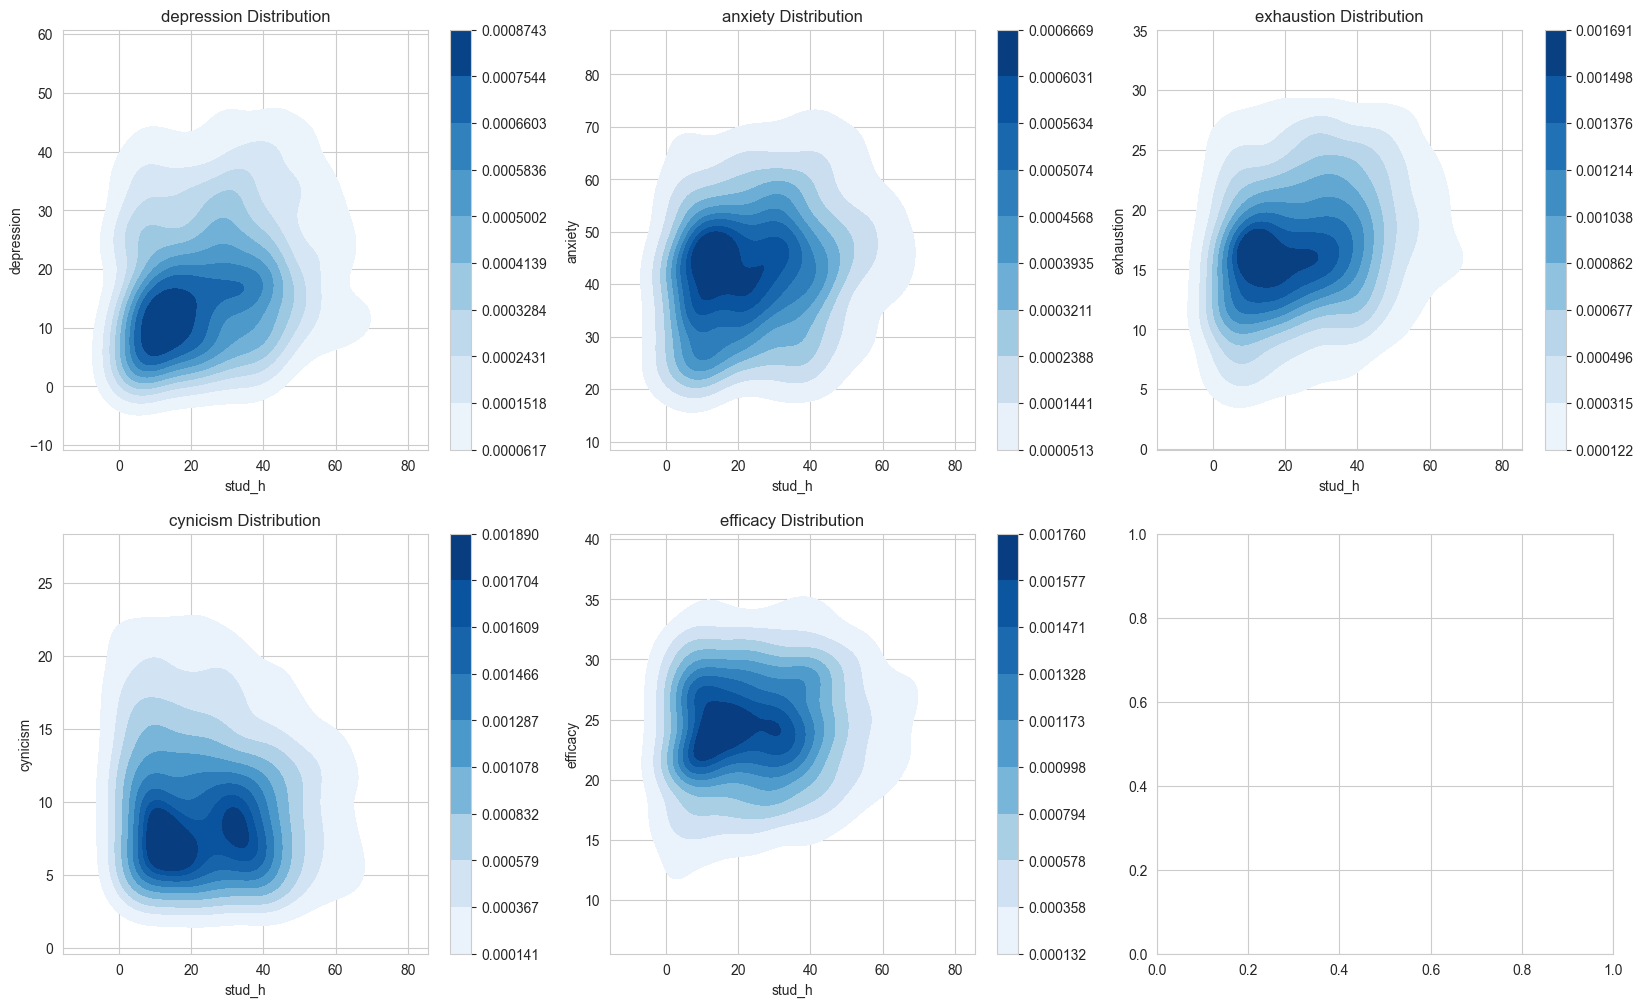

In [17]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

mental_health_vars = ['depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']
for i in range(len(mental_health_vars)):
    sns.kdeplot(data=data_df, x='stud_h', y=mental_health_vars[i],ax=axes[i//3, i%3], fill=True, cmap="Blues", cbar=True)

    axes[i//3, i%3].set_title(f"{mental_health_vars[i]} Distribution")

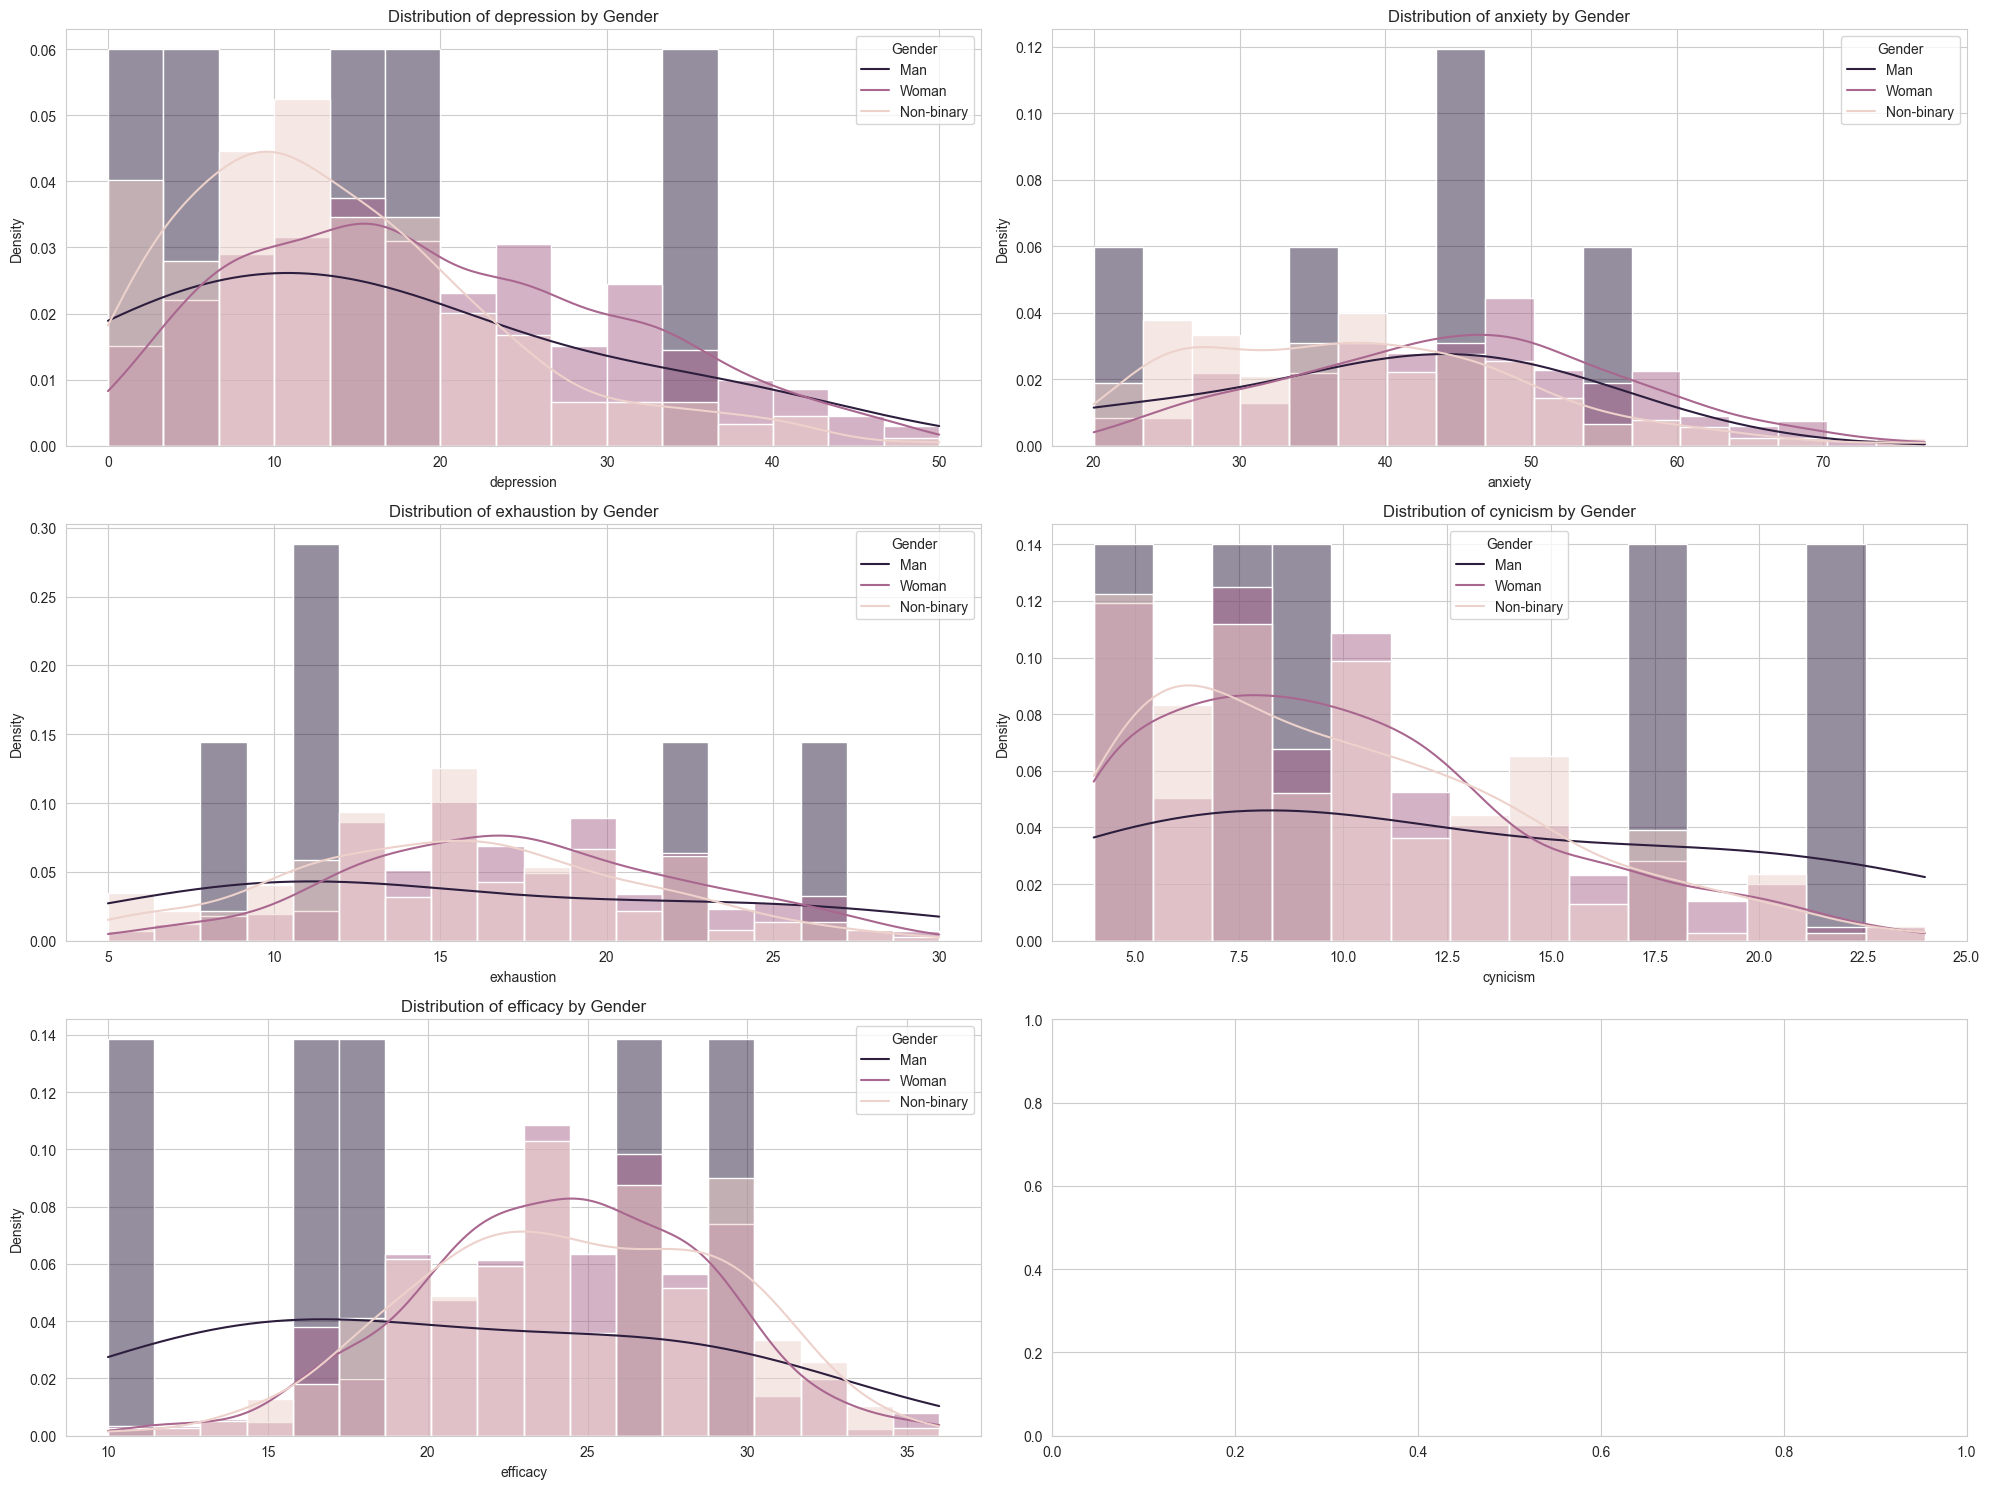

In [18]:
mental = ['depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

for i, variable in enumerate(mental):
    sns.histplot(data=data_df, x=variable, hue='sex', stat='density', common_norm=False, kde=True, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {variable} by Gender')
    axes[i//2, i%2].legend(title='Gender', labels=['Man', 'Woman', 'Non-binary'])

plt.tight_layout()
plt.show()


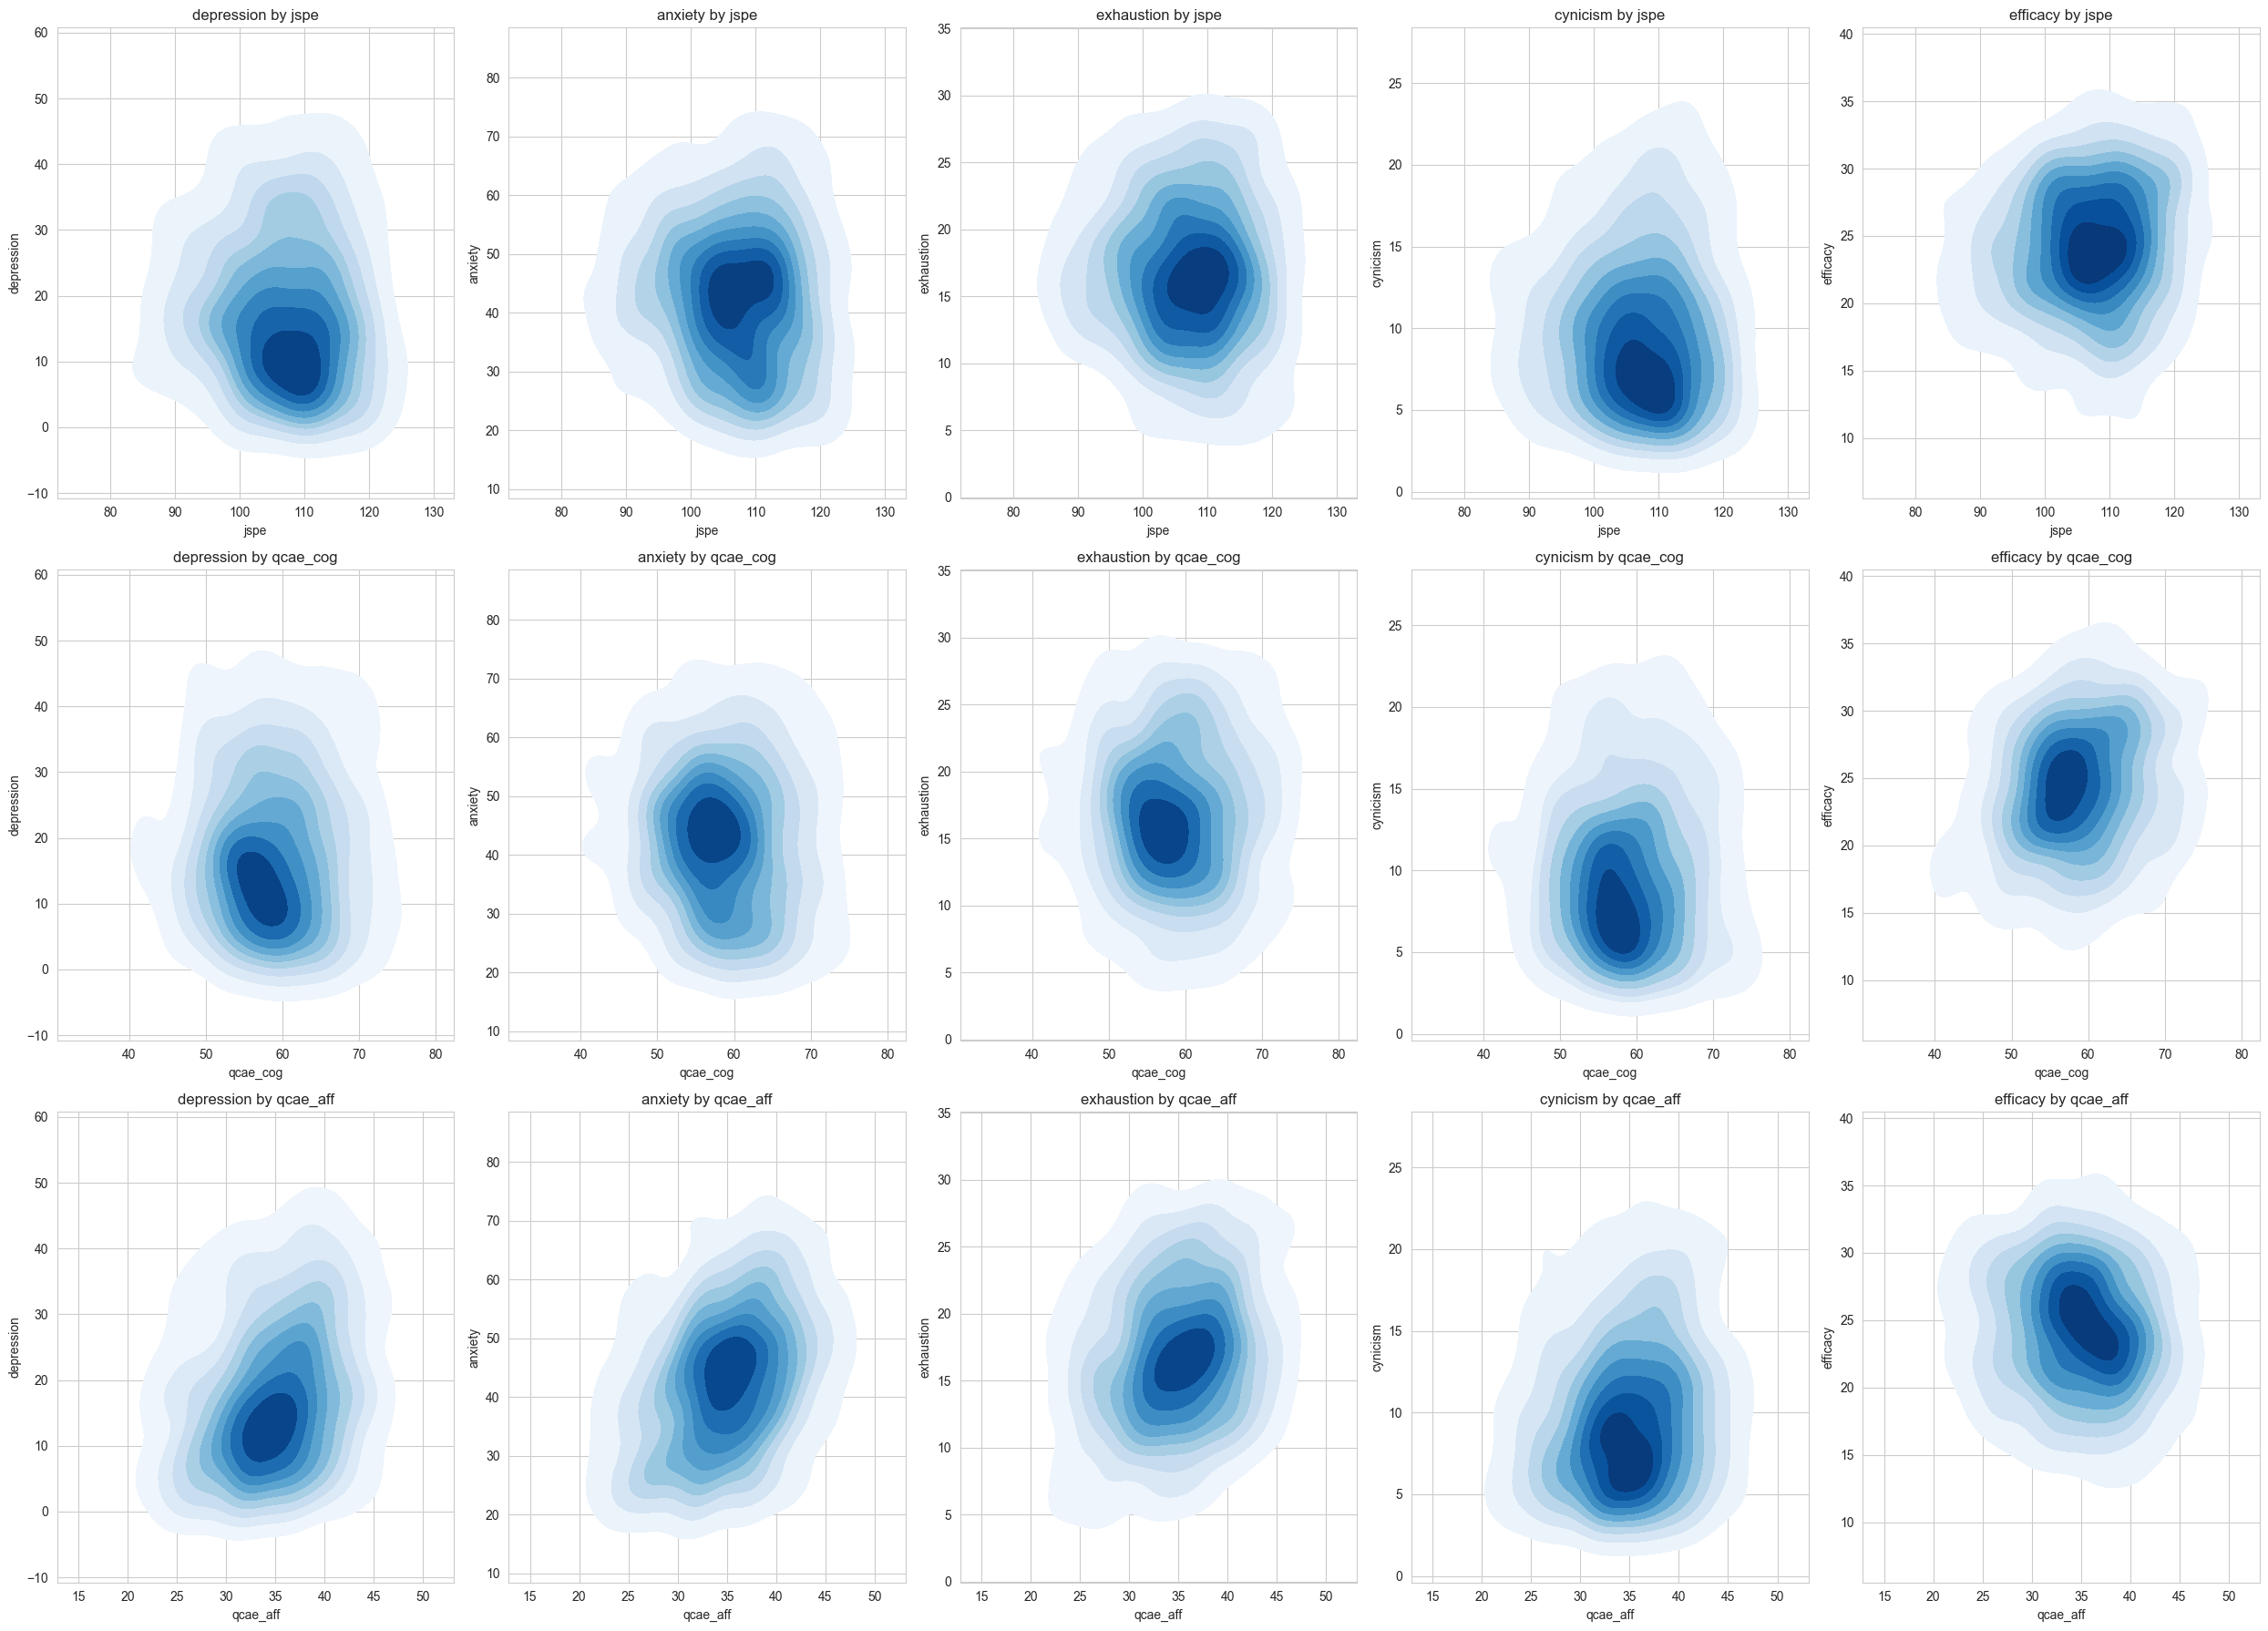

In [19]:
sns.set_style("whitegrid")

test = ['jspe', 'qcae_cog', 'qcae_aff']
mental = ['depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']


fig, axes = plt.subplots(nrows=len(test), ncols=len(mental), figsize=(25, 18))

for i, test_var in enumerate(test):
    for j, mental_var in enumerate(mental):
        sns.kdeplot(data=data_df, x=test_var, y=mental_var, ax=axes[i][j], cmap="Blues", fill=True)
        axes[i][j].set_title(f'{mental_var} by {test_var}')

plt.tight_layout()
plt.show()



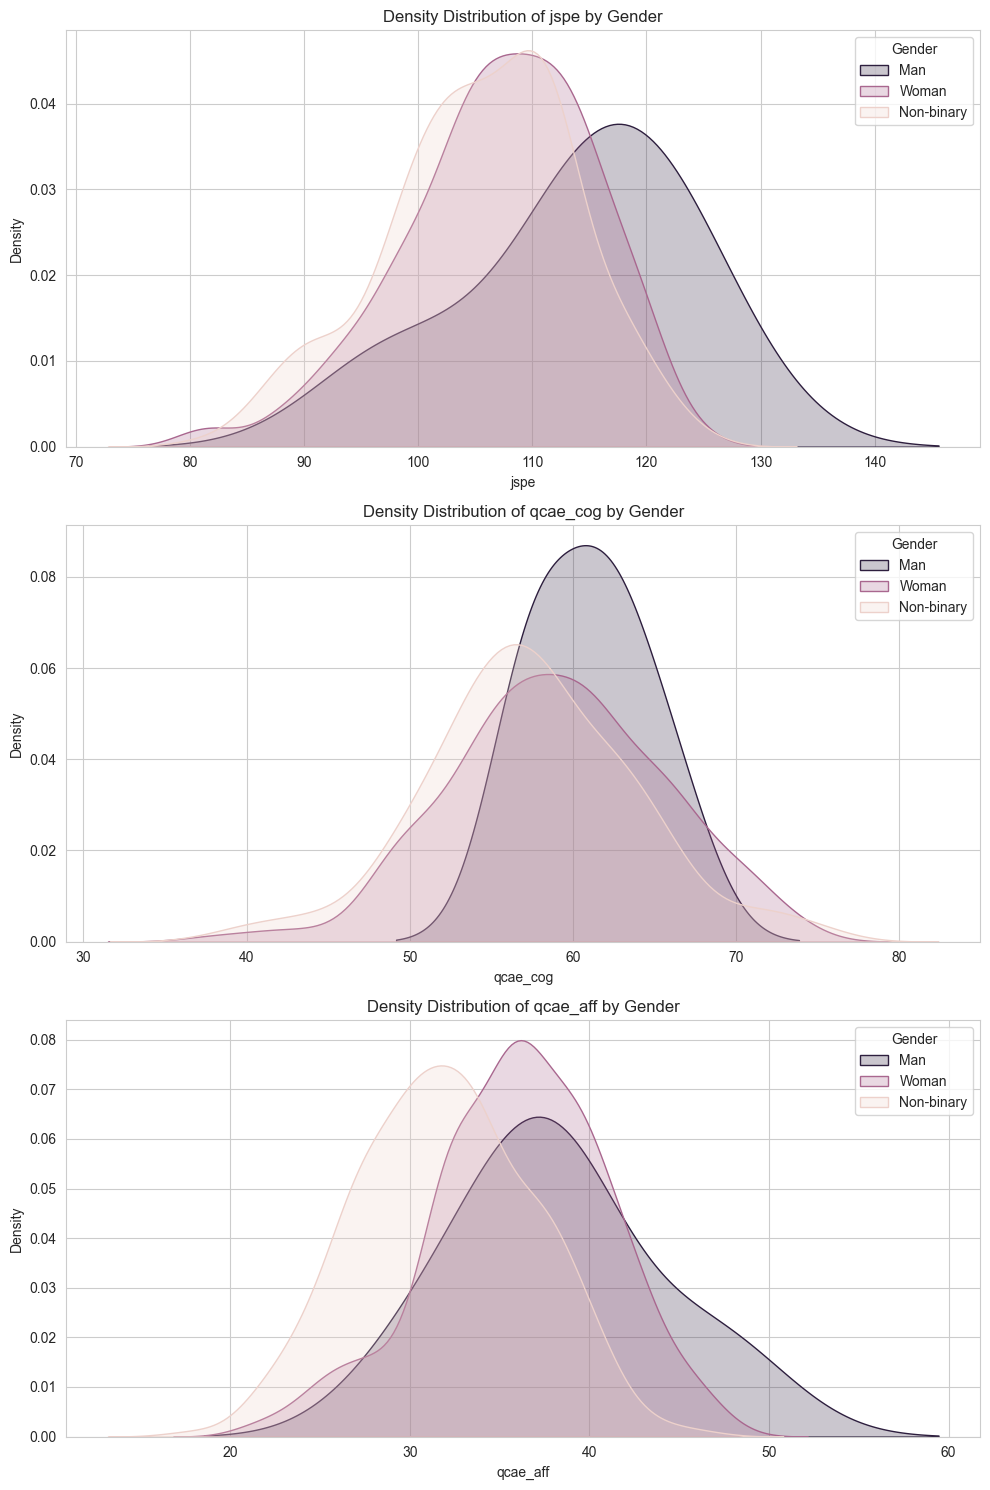

In [20]:

fig, axes = plt.subplots(nrows=len(test), figsize=(10, 15))

for i, test_var in enumerate(test):
    sns.kdeplot(data=data_df, x=test_var, hue='sex', ax=axes[i], fill=True, common_norm=False)
    axes[i].set_title(f'Density Distribution of {test_var} by Gender')
    axes[i].legend(title='Gender', labels=['Man', 'Woman', 'Non-binary'])

plt.tight_layout()
plt.show()


## 전체 데이터의 heatmap

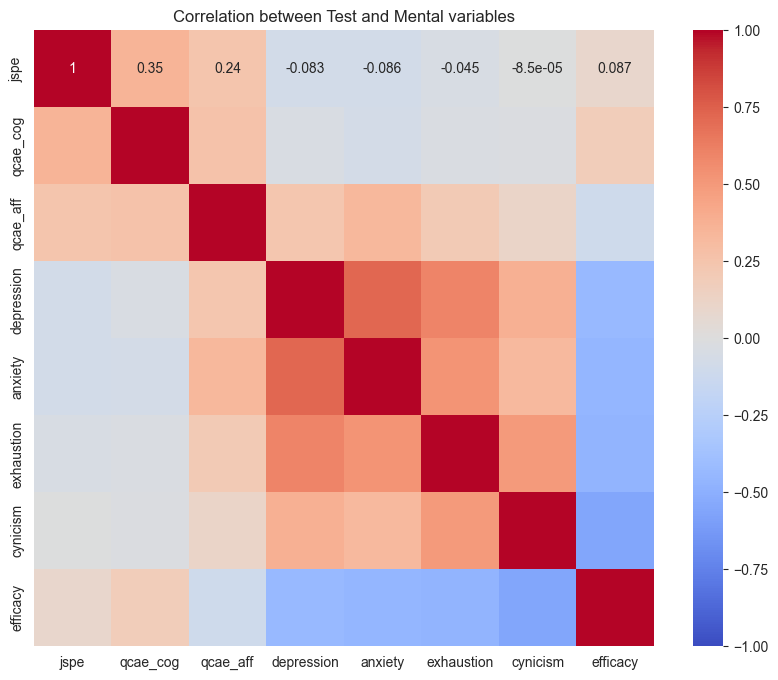

In [21]:
correlation_matrix = data_df[test + mental].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Test and Mental variables')
plt.show()

## 감정들의 상관관계

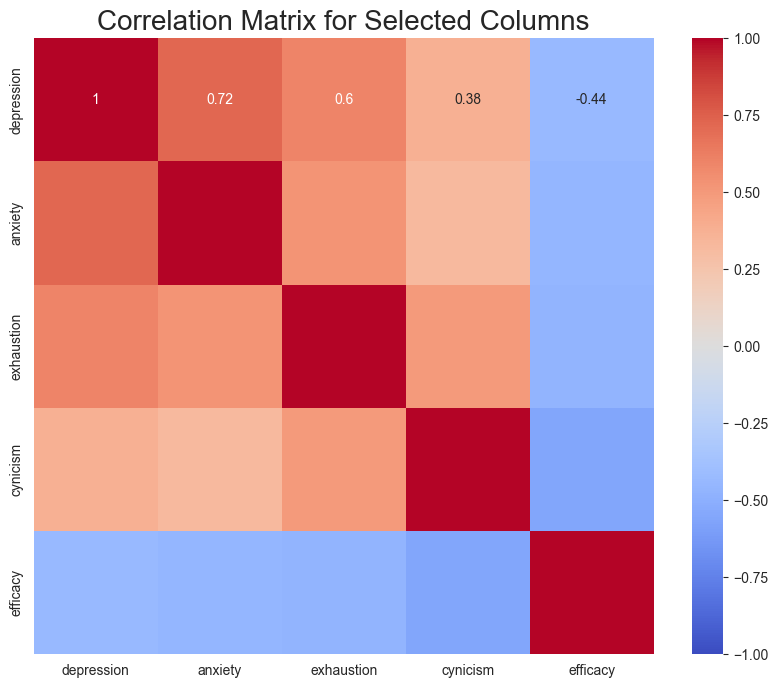

In [22]:

selected_data = data_df.iloc[:, 14:19]

selected_corr_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix for Selected Columns", fontsize=20)
plt.show()

## health와 건강상태 상관관계 및 바이올린 도표

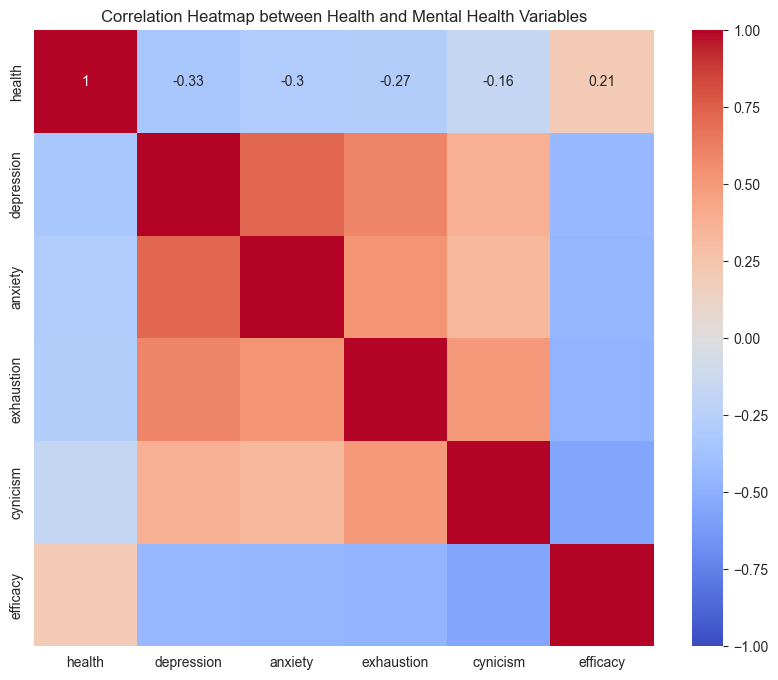

In [23]:
selected_vars = ['health'] + mental_health_vars
correlation_matrix = data_df[selected_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Correlation Heatmap between Health and Mental Health Variables")
plt.show()

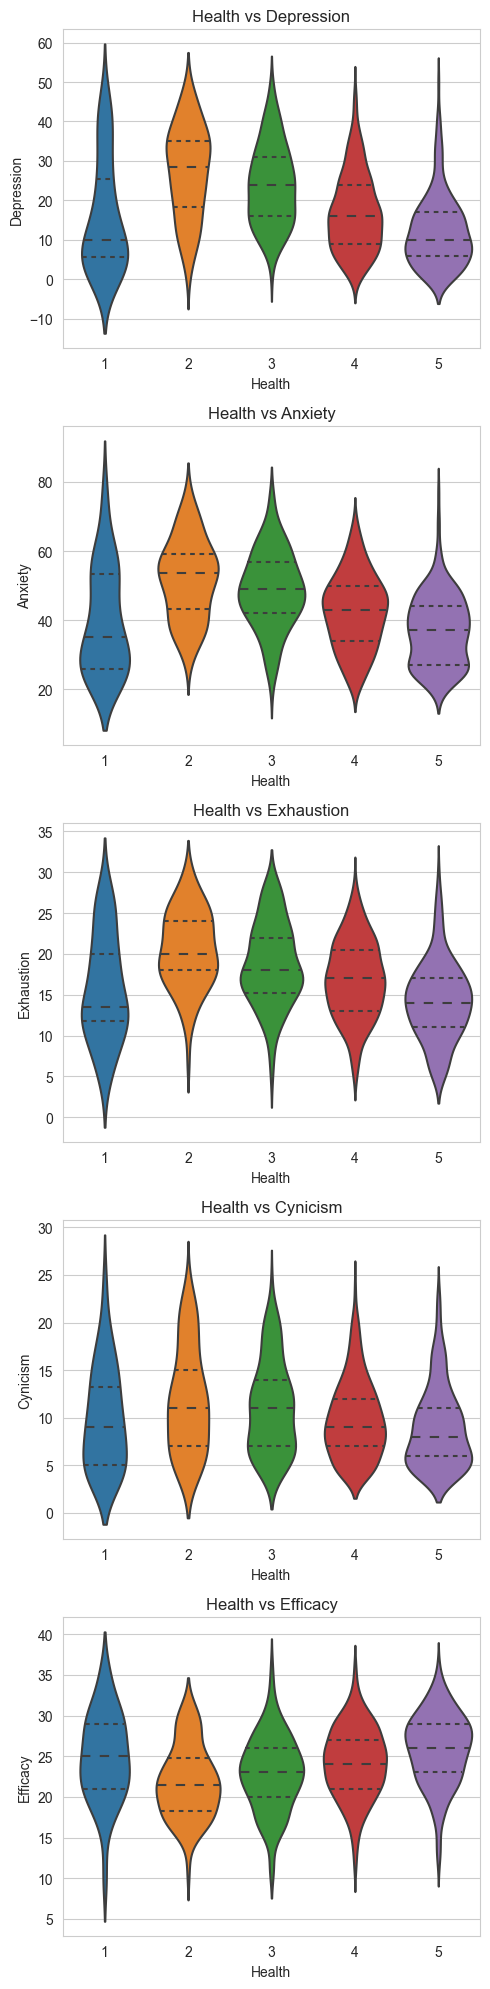

In [24]:
fig, axs = plt.subplots(len(mental_health_vars), 1, figsize=(5, 20))

for ax, var_col in zip(axs, mental_health_vars):
    sns.violinplot(data=data_df, x='health', y=var_col, ax=ax, inner='quartile')
    ax.set_title(f'Health vs {var_col.capitalize()}')
    ax.set_ylabel(var_col.capitalize())
    ax.set_xlabel('Health')

plt.tight_layout()
plt.show()


## 정신과 검사 이력에 따른 멘탈 상태

In [25]:
# Filter the data based on psyt values
data_psyt_0 = data_df[data_df['psyt'] == 0][['depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']]
data_psyt_1 = data_df[data_df['psyt'] == 1][['depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']]
# Calculate descriptive statistics for both groups
stats_psyt_0 = data_psyt_0.describe()
stats_psyt_1 = data_psyt_1.describe()

stats_psyt_0, stats_psyt_1



(       depression     anxiety  exhaustion    cynicism    efficacy
 count  677.000000  677.000000  677.000000  677.000000  677.000000
 mean    16.183161   40.937962   16.332349    9.654357   24.655835
 std     10.573166   11.194713    5.166492    4.428111    4.506539
 min      0.000000   20.000000    5.000000    4.000000   10.000000
 25%      8.000000   33.000000   13.000000    6.000000   22.000000
 50%     15.000000   41.000000   16.000000    9.000000   25.000000
 75%     23.000000   49.000000   20.000000   12.000000   28.000000
 max     49.000000   77.000000   30.000000   24.000000   36.000000,
        depression     anxiety  exhaustion    cynicism    efficacy
 count  196.000000  196.000000  196.000000  196.000000  196.000000
 mean    23.326531   49.270408   18.535714   11.209184   22.913265
 std     11.111348   11.994586    5.047848    4.669829    4.671532
 min      0.000000   21.000000    5.000000    4.000000   11.000000
 25%     15.000000   42.000000   15.000000    7.750000   20.0

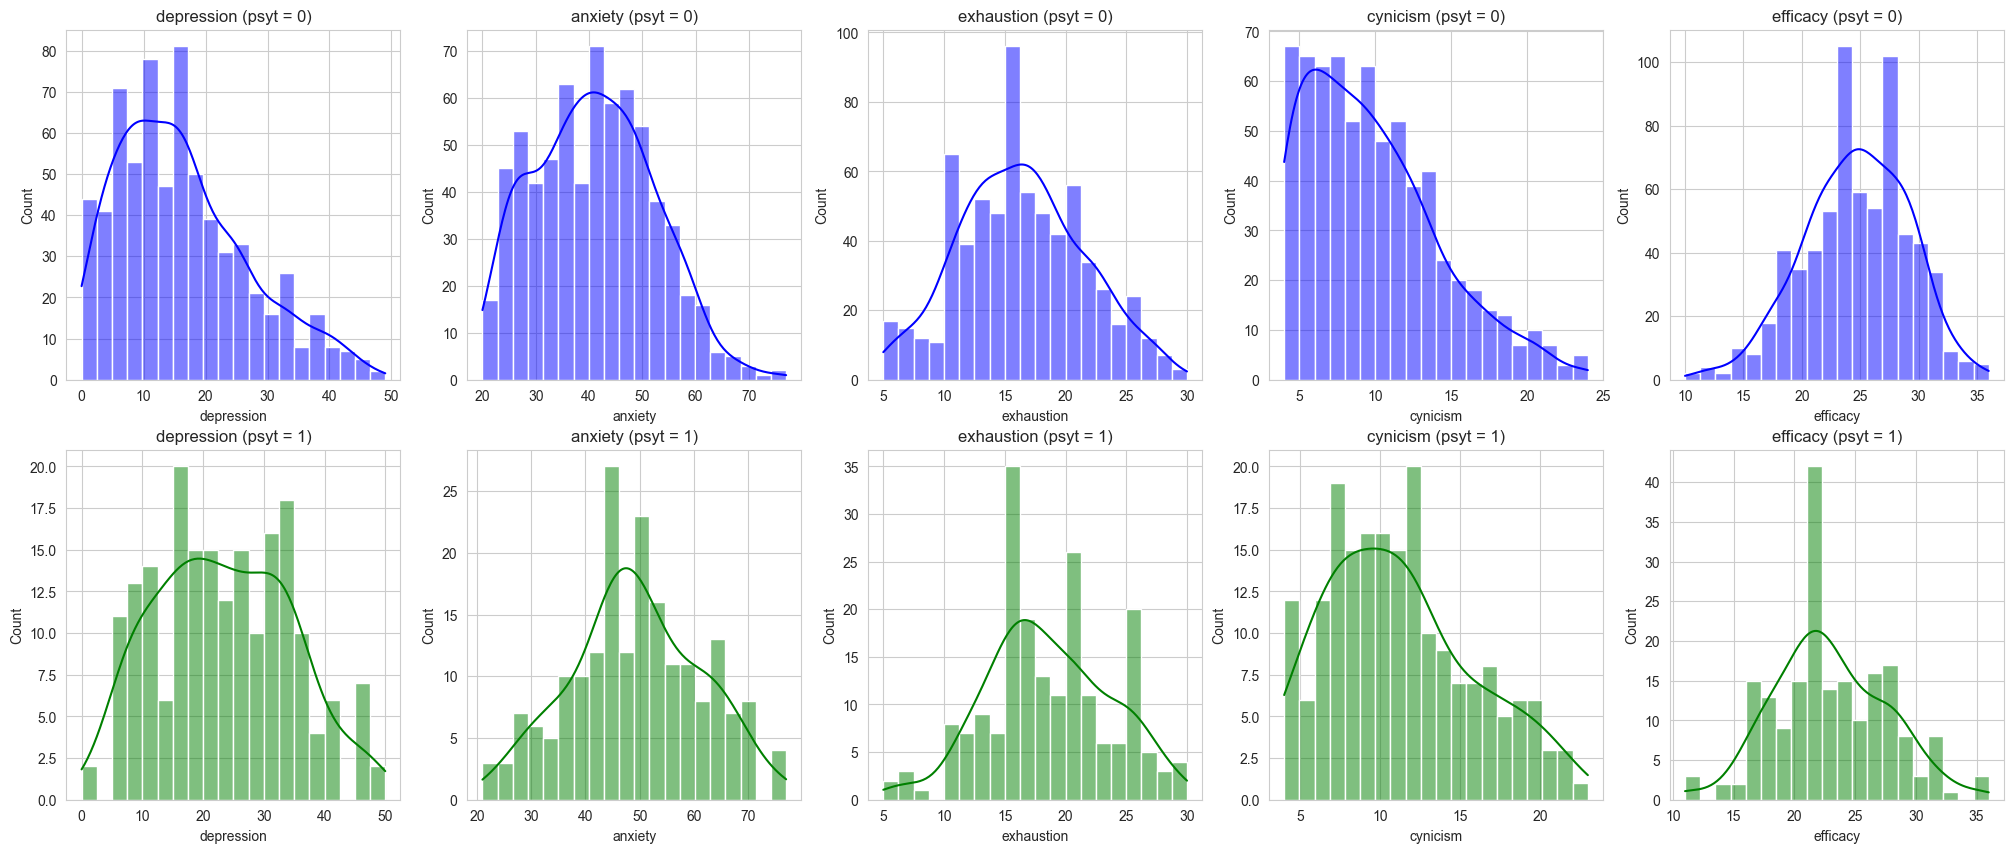

In [26]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,10))

mental_list = ["depression", "anxiety", "exhaustion", "cynicism", "efficacy"]
for i in range(len(mental_list)):

    sns.histplot(data=data_psyt_0[mental_list[i]], bins=20, ax=axes[0, i], kde = True, color='blue')
    axes[0, i].set_title(f'{mental_health_vars[i]} (psyt = 0)')

    sns.histplot(data=data_psyt_1[mental_list[i]], bins=20, ax=axes[1, i], kde = True, color='green')
    axes[1, i].set_title(f'{mental_health_vars[i]} (psyt = 1)')

## partnership에 따른 건강 및 mental

In [27]:
data_part_0 = data_df[data_df['part'] == 0][['depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']]
data_part_1 = data_df[data_df['part'] == 1][['depression', 'anxiety', 'exhaustion', 'cynicism', 'efficacy']]
# Calculate descriptive statistics for both groups
stats_part_0 = data_part_0.describe()
stats_part_1 = data_part_1.describe()

stats_part_0, stats_part_1

(       depression     anxiety  exhaustion    cynicism    efficacy
 count  380.000000  380.000000  380.000000  380.000000  380.000000
 mean    19.339474   43.913158   16.947368   10.126316   23.947368
 std     11.513810   12.101171    5.126100    4.693210    4.651708
 min      0.000000   20.000000    5.000000    4.000000   10.000000
 25%     10.000000   35.000000   13.000000    6.000000   21.000000
 50%     18.000000   44.000000   16.500000    9.000000   24.000000
 75%     27.000000   53.000000   21.000000   13.000000   27.000000
 max     49.000000   77.000000   30.000000   24.000000   36.000000,
        depression     anxiety  exhaustion    cynicism    efficacy
 count  493.000000  493.000000  493.000000  493.000000  493.000000
 mean    16.590264   41.957404   16.734280    9.908722   24.509128
 std     10.624526   11.669927    5.292691    4.398099    4.548119
 min      0.000000   20.000000    5.000000    4.000000   11.000000
 25%      8.000000   33.000000   13.000000    6.000000   22.0

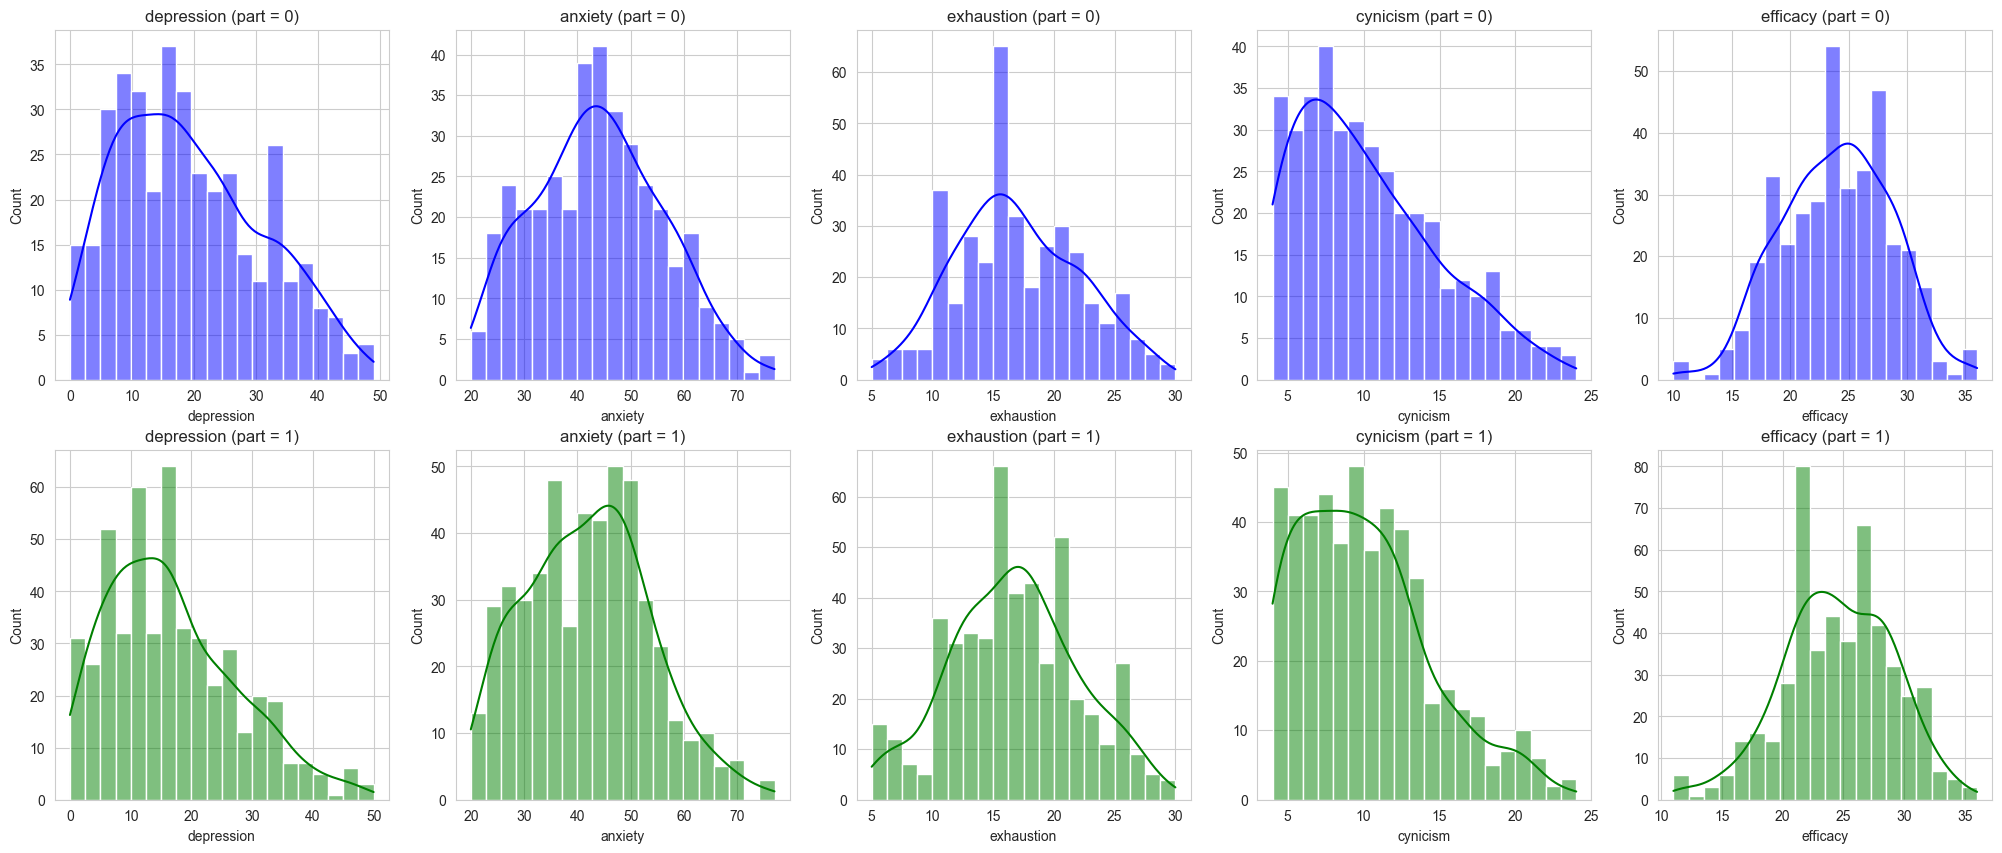

In [28]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,10))

mental_list = ["depression", "anxiety", "exhaustion", "cynicism", "efficacy"]
for i in range(len(mental_list)):

    sns.histplot(data=data_part_0[mental_list[i]], bins=20, ax=axes[0, i], kde = True, color='blue')
    axes[0, i].set_title(f'{mental_health_vars[i]} (part = 0)')

    sns.histplot(data=data_part_1[mental_list[i]], bins=20, ax=axes[1, i], kde = True, color='green')
    axes[1, i].set_title(f'{mental_health_vars[i]} (part = 1)')

## QQ plot

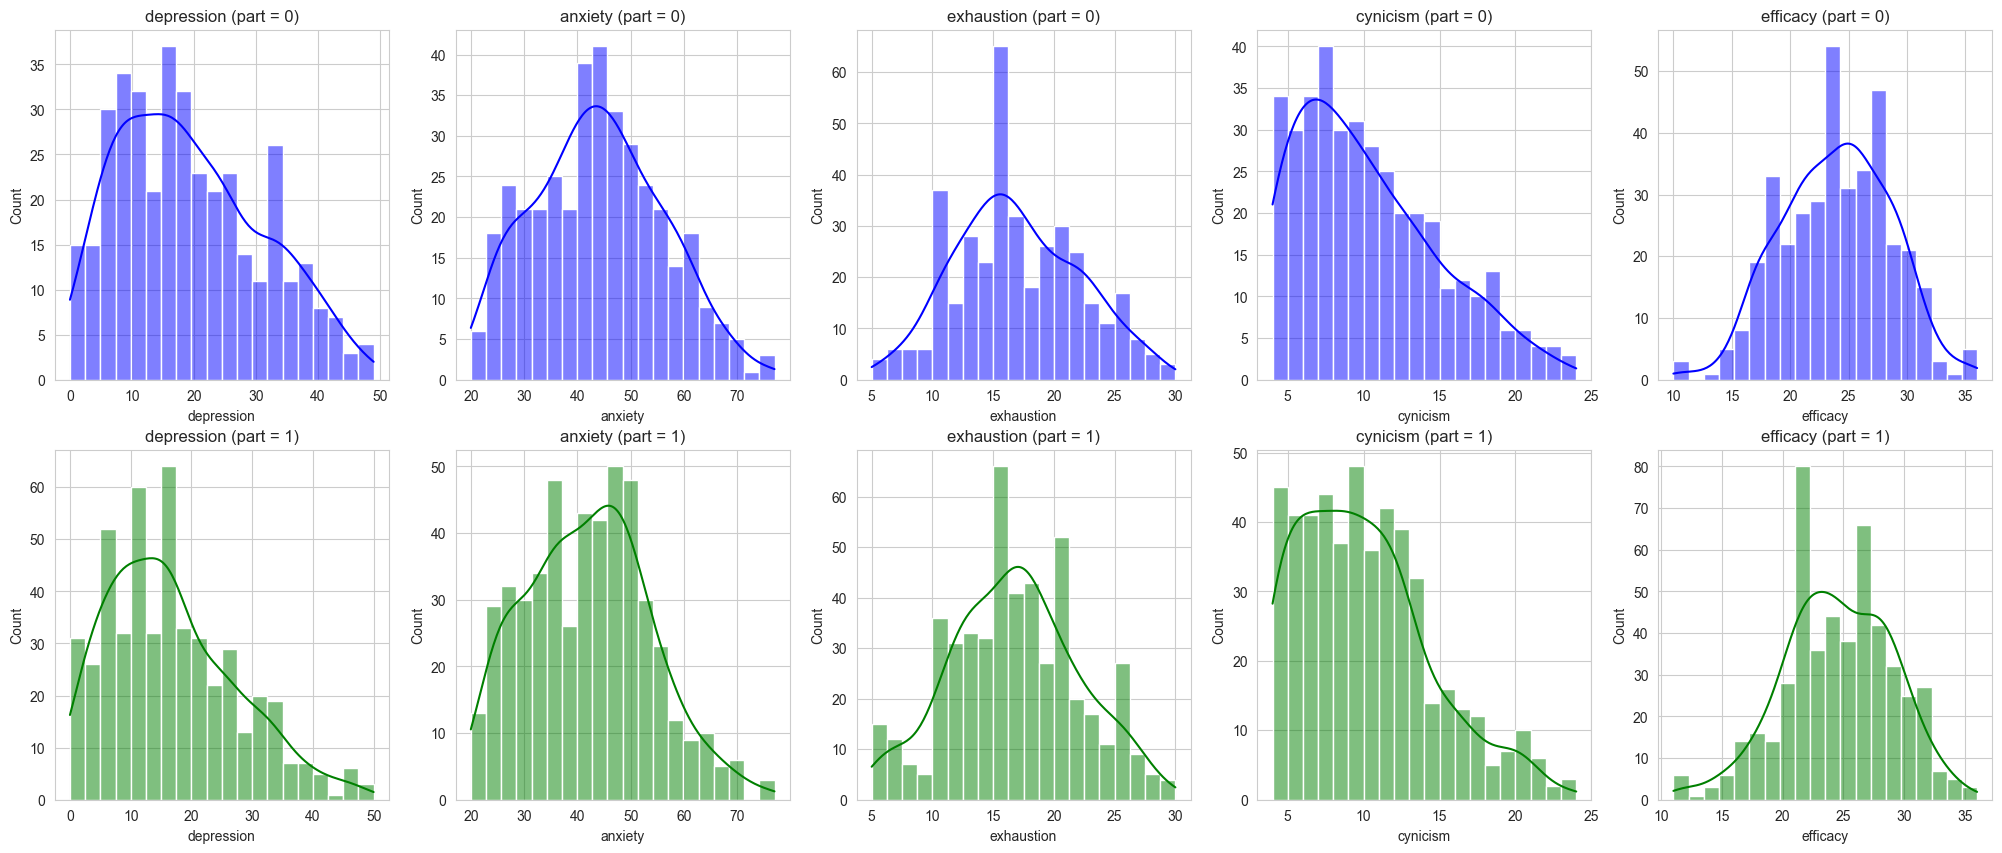

In [29]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(25,10))

mental_list = ["depression", "anxiety", "exhaustion", "cynicism", "efficacy"]
for i in range(len(mental_list)):

    sns.histplot(data=data_part_0[mental_list[i]], bins=20, ax=axes[0, i], kde = True, color='blue')
    axes[0, i].set_title(f'{mental_health_vars[i]} (part = 0)')

    sns.histplot(data=data_part_1[mental_list[i]], bins=20, ax=axes[1, i], kde = True, color='green')
    axes[1, i].set_title(f'{mental_health_vars[i]} (part = 1)')

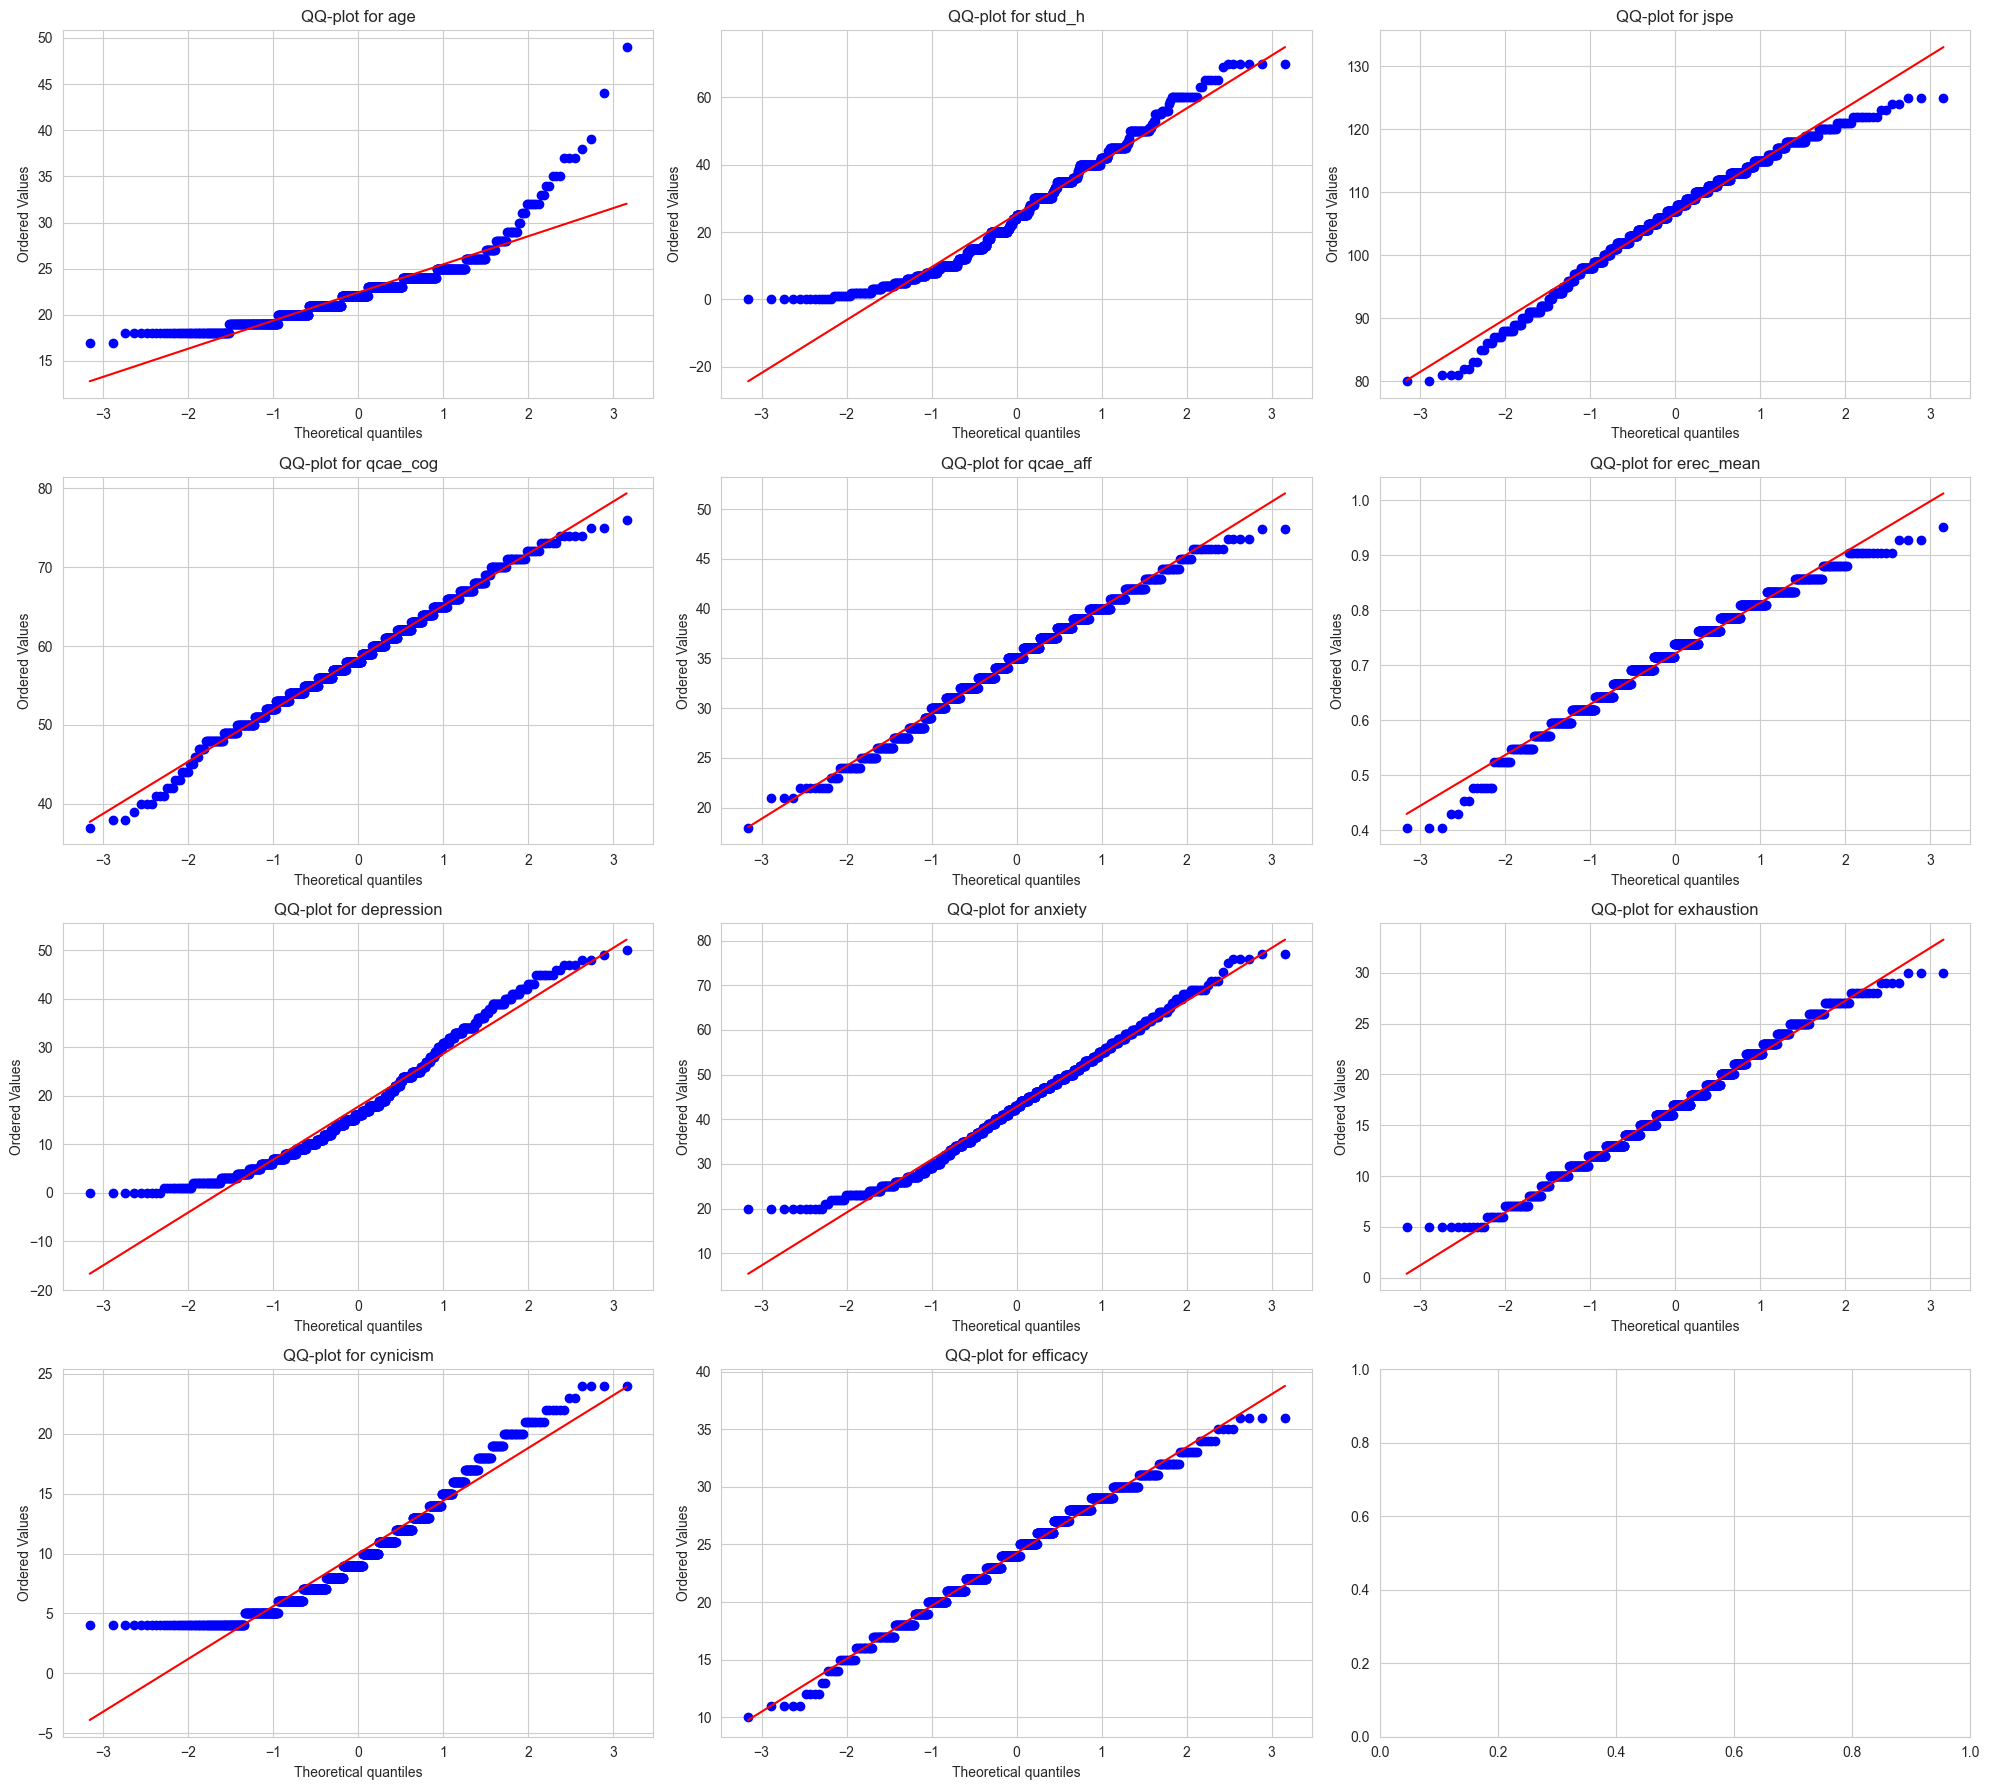

In [30]:
select_cols = ['age', 'stud_h', 'jspe', 'qcae_cog', 'qcae_aff', 'erec_mean'] + mental_list

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 18))

for ax, col in zip(axes.ravel(), select_cols):
    stats.probplot(data_df[col], plot=ax)
    ax.set_title(f'QQ-plot for {col}')

plt.tight_layout()
plt.show()
